# Анализ данных интернет-магазина по продаже компьютерных игр
    
  
  # Описание проекта:

Интернет-магазин `«Стримчик»` продаёт компьютерные игры по всему миру. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы.

**Цель проекта:**

Для планирования рекламных кампаний необходимо выявить закономерности, определяющие успешность игры и определить потенциально популярный продукт.

**Описание данных:**

`name` — название игры

`platform` — платформа

`year_of_release` — год выпуска

`genre` — жанр игры

`nA_sales` — продажи в Северной Америке (миллионы проданных копий)

`eu_sales` — продажи в Европе (миллионы проданных копий)

`jp_sales` — продажи в Японии (миллионы проданных копий)

`other_sales` — продажи в других странах (миллионы проданных копий)

`critic_score` — оценка критиков (максимум 100)

`user_score` — оценка пользователей (максимум 10)

`rating` — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.


**План исследования:**

* Выгрузка и предобработка данных
* Исследовательский анализ данных
* Портрет пользователя для каждого региона
* Проверка гипотез
* Выводы и рекомендации

# Шаг 1. Выгрузка и предобработка данных

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from scipy import stats as st

In [2]:
data= pd.read_csv('/datasets/games.csv')

In [3]:
data

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


**Изучим данные**

Посмотрим на тип данных

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Посмотрим на наличие явных дубликатов

In [5]:
data.duplicated().sum()

0

Посмотрим на пропуски

In [6]:
data.isna().sum().sort_values()

Platform              0
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Name                  2
Genre                 2
Year_of_Release     269
User_Score         6701
Rating             6766
Critic_Score       8578
dtype: int64

Посмотрим на числовые значения

In [7]:
data.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


**Наблюдения**

* В наших данных более 16.7 тыс. строк и 11 столбцов
* Тип данных не везде указан верно, необходимо заменить тип в столбце Year_of_Release на int и в столбце User_Score на float
* Явные дубликаты отсутствуют
* Лучше привести к нижнему регистру названия столбцов
* Имеются пропуски столбцах с оценкой критиков/пользователей и с рейтингом (40-50% от всего датафрейма)

**Приведем названия столбцов к нижнему регистру**

In [8]:
data.columns=data.columns.str.lower()

**Посмотрим на уникальные значения**

Сэкономим время на написания запросов на столбцы по отдельноси, напишем цикл

In [9]:
for columns in data[['platform', 'genre', 'year_of_release', 'critic_score', 'user_score', 'rating']]:
    print(f'\nуникальные значения в столбце \033[1;4;30m{columns}\033[0m\n',data[columns].unique())


уникальные значения в столбце platform
 ['Wii' 'NES' 'GB' 'DS' 'X360' 'PS3' 'PS2' 'SNES' 'GBA' 'PS4' '3DS' 'N64'
 'PS' 'XB' 'PC' '2600' 'PSP' 'XOne' 'WiiU' 'GC' 'GEN' 'DC' 'PSV' 'SAT'
 'SCD' 'WS' 'NG' 'TG16' '3DO' 'GG' 'PCFX']

уникальные значения в столбце genre
 ['Sports' 'Platform' 'Racing' 'Role-Playing' 'Puzzle' 'Misc' 'Shooter'
 'Simulation' 'Action' 'Fighting' 'Adventure' 'Strategy' nan]

уникальные значения в столбце year_of_release
 [2006. 1985. 2008. 2009. 1996. 1989. 1984. 2005. 1999. 2007. 2010. 2013.
 2004. 1990. 1988. 2002. 2001. 2011. 1998. 2015. 2012. 2014. 1992. 1997.
 1993. 1994. 1982. 2016. 2003. 1986. 2000.   nan 1995. 1991. 1981. 1987.
 1980. 1983.]

уникальные значения в столбце critic_score
 [76. nan 82. 80. 89. 58. 87. 91. 61. 97. 95. 77. 88. 83. 94. 93. 85. 86.
 98. 96. 90. 84. 73. 74. 78. 92. 71. 72. 68. 62. 49. 67. 81. 66. 56. 79.
 70. 59. 64. 75. 60. 63. 69. 50. 25. 42. 44. 55. 48. 57. 29. 47. 65. 54.
 20. 53. 37. 38. 33. 52. 30. 32. 43. 45. 51. 40. 46. 39.

**Что видим**

* в `user_score` есть такое значение как `tbd`, в рйтингах и оценках tbd означает **'to be determined'**, что в свою очередь означает, что рейтинг ещё не присвоен по тем или иным причинам, поэтому предлагаю поемять значение `tbd` на `nan`
* в `rating` мы видим рейтинговую систему `ESRB`(**Entertainment Software Rating Board**), но насколько мне известно она притерпела некоторые изменения, в частности продуктам с рейтенгами `K-A`(**Kids to Adults**) и `EC`(**Early Childhood**) сейчас присваивается рейтинг `E`(**Everyone**), поэтому предлагаю восстановить справедливость и тут также поменять рейтинговую систему

In [10]:
data['user_score'] = data['user_score'].replace('tbd', np.nan)
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', '8.8', '6.9', '9.4', '6.8', '6.1',
       '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6', '3.7',
       '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9', '3.1',
       '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3', '2.7',
       '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0', '1.6',
       '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2', '2.3',
       '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'], dtype=object)

In [11]:
data.loc[data['rating'] == 'K-A', 'rating'] = 'E'
data.loc[data['rating'] == 'EC', 'rating'] = 'E'
data['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'AO', 'RP'], dtype=object)

**Посмотрим на количество "представителей" рейтингов**

In [12]:
data['rating'].value_counts()

E       4001
T       2961
M       1563
E10+    1420
RP         3
AO         1
Name: rating, dtype: int64

**Далее рассмотрим пропущенные значения**

Пропуски в названии игры

In [13]:
data.query('name.isnull()')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


В данном случае отсутствует слишком много данных для ручного восстановления, пропуски составляют **0.01%** данных, будет целесообразно их удалить.

In [14]:
data=data.dropna(subset=['name'])
data.query('name.isnull()')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


Пропуски в годах выпуска игр

In [15]:
data.query('year_of_release.isnull()')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,NaN,E10+
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


**269 пропусков**, что составляет **1.6 %** от всего датафрейма. Пропуски появляются внутри одной игры на разных платформах, в теории можно было бы заполнить в ручную, но поскольку процент пропусков не так высок, предлагаю удалить данные строки с пропуском года.

In [16]:
data=data.dropna(subset=['year_of_release'])
data.query('year_of_release.isnull()')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


Пропуски в рейтингах игр

In [17]:
data.query('rating.isnull()').sample(15)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
16441,Jambo! Safari Animal Rescue,DS,2009.0,Simulation,0.01,0.00,0.00,0.00,NaN,NaN,NaN
10385,Viewtiful Joe: Double Trouble!,DS,2005.0,Action,0.08,0.00,0.01,0.01,NaN,NaN,NaN
3177,Dragon Quest Monsters Joker 3,3DS,2016.0,Role-Playing,0.00,0.00,0.63,0.00,NaN,NaN,NaN
12342,Kururin Paradise,GBA,2002.0,Puzzle,0.00,0.00,0.06,0.00,NaN,NaN,NaN
7846,Warhammer: Shadow of the Horned Rat,PS,1996.0,Strategy,0.11,0.07,0.00,0.01,NaN,NaN,NaN
3172,Nightmare Creatures,PS,1997.0,Action,0.35,0.24,0.00,0.04,NaN,NaN,NaN
13943,Famicom Remix Best Choice,3DS,2015.0,Action,0.00,0.00,0.04,0.00,NaN,NaN,NaN
9756,Mobile Suit Gundam Side Story: Missing Link,PS3,2014.0,Action,0.00,0.00,0.12,0.00,NaN,NaN,NaN
8511,Kawa no Nushi Tsuri,PS,1998.0,Sports,0.00,0.00,0.15,0.01,NaN,NaN,NaN
12975,Winning Post 8,PS3,2014.0,Racing,0.00,0.00,0.05,0.00,NaN,NaN,NaN


Проверим некоторые игры на возможное наличие рейтинга.

In [18]:
data.query('name == "Dishonored"')[['name', 'rating']]#не ожидал, что увижу тут Dishonored, но я рад - обожаю эту игру :smile:

,name,rating
1041,Dishonored,M
1224,Dishonored,M
3919,Dishonored,NaN
4886,Dishonored,NaN
8880,Dishonored,NaN


In [19]:
data.query('name == "FIFA 12"')[['name', 'rating']]

,name,rating
122,FIFA 12,NaN
278,FIFA 12,NaN
2677,FIFA 12,NaN
3843,FIFA 12,NaN
4191,FIFA 12,NaN
4902,FIFA 12,NaN
11237,FIFA 12,NaN


В данном случае мы видим, что у некоторых игр имеются непропущенные значения, но т.к. у разных платформ может быть разный рейтинг заполним все пропуски значением `unknown`

In [20]:
data['rating'] = data['rating'].fillna('unknown') 

Пропуски в оценке пользователей

In [21]:
data.query('user_score.isnull()')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,unknown
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,unknown
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,unknown
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,unknown
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,unknown
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,unknown
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,unknown
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,unknown
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,unknown


Пропуски в оценке критиков

In [22]:
data.query('critic_score.isnull()')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,unknown
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,unknown
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,unknown
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,unknown
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,unknown
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,unknown
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,unknown
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,unknown
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,unknown


Заметим что пропуски в оценке критиков сопровождаются пропусками и в оценке пользователей и в рейтинге. Можно предположить, что это более похоже на технический сбой при заполнении или выгрузке информации. Конечно, в данном случае удалить строки с пропусками мы не можем, т.к. они содержат **более 50% данных**, оставим без изменений.

**Приведем столбцы к корректному типу данных**

In [23]:
data=data.astype({'year_of_release':'int','user_score':'float'})

Посмотрим на неявные дубликаты

In [24]:
data[['name', 'platform']].duplicated().sum()

3

In [25]:
data[data[['name', 'platform']].duplicated(keep = False)]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
604,Madden NFL 13,PS3,2012,Sports,2.11,0.22,0.00,0.23,83.0,5.5,E
1190,Need for Speed: Most Wanted,X360,2012,Racing,0.62,0.78,0.01,0.15,83.0,8.5,T
1591,Need for Speed: Most Wanted,X360,2005,Racing,1.00,0.13,0.02,0.10,83.0,8.5,T
5972,Need for Speed: Most Wanted,PC,2005,Racing,0.02,0.23,0.00,0.04,82.0,8.5,T
11715,Need for Speed: Most Wanted,PC,2012,Racing,0.00,0.06,0.00,0.02,82.0,8.5,T
16230,Madden NFL 13,PS3,2012,Sports,0.00,0.01,0.00,0.00,83.0,5.5,E


Из открытых источников удалось выяснить что игра `Need for Speed: Most Wanted` выпускалась и `2005` и в `2012` годах для обеих платформ, оставим данные без изменений. Строки `604` и `16230` явные дубликаты, удалим строку `16230`, т.к. в ней дублируются значения и она содержит меньше информации.

In [26]:
data=data.drop(index = 16230)

Посмотрим на характеристики столбца `user_score`

In [27]:
data['user_score'].describe()

count    7462.000000
mean        7.126548
std         1.499429
min         0.000000
25%         6.400000
50%         7.500000
75%         8.200000
max         9.700000
Name: user_score, dtype: float64

**Посчитаем суммарные продажи по играм**

In [28]:
data['global_sales'] = data[['na_sales','eu_sales','jp_sales','other_sales']].sum(axis=1)  
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,global_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,unknown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,unknown,31.38


In [29]:
data['global_sales'].describe()

count    16443.000000
mean         0.536055
std          1.558828
min          0.000000
25%          0.060000
50%          0.170000
75%          0.470000
max         82.540000
Name: global_sales, dtype: float64

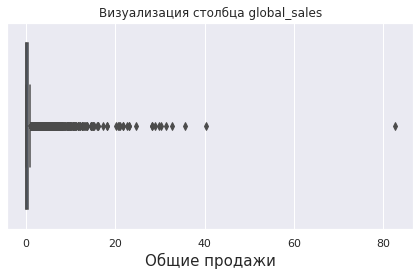

In [30]:
sns.boxplot(data=data, x='global_sales')
plt.title('Визуализация столбца global_sales')
plt.xlabel('Общие продажи', size='15')
plt.tight_layout()
plt.show()

В данном столбце у нас есть значительные отклонения. Среднее значение равно **0.54 млн.** проданных копий, тогда как медианное значение равно **0.17.** На графике также видно, что основная масса значений сосредоточена в районе **0-0.2 миллиона копий.**

**Рассмотрим минимальные и максимальные значения.**

In [31]:
data.query('global_sales == 0')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,global_sales
16676,G1 Jockey 4 2008,PS3,2008,Sports,0.0,0.0,0.0,0.0,NaN,NaN,unknown,0.0
16709,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,0.0,0.0,0.0,0.0,NaN,NaN,unknown,0.0


Здесь слишком мало информации

In [32]:
data.query('global_sales > 80')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,global_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54


Данные, вроде, выглядят коррекно, но значение выбивается за рамки, поэтому его и 2 значения выше мы удаляем

In [33]:
data.shape

(16443, 12)

Обновим индексы

In [34]:
data = data.reset_index(drop=True)

In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16443 entries, 0 to 16442
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16443 non-null  object 
 1   platform         16443 non-null  object 
 2   year_of_release  16443 non-null  int64  
 3   genre            16443 non-null  object 
 4   na_sales         16443 non-null  float64
 5   eu_sales         16443 non-null  float64
 6   jp_sales         16443 non-null  float64
 7   other_sales      16443 non-null  float64
 8   critic_score     7982 non-null   float64
 9   user_score       7462 non-null   float64
 10  rating           16443 non-null  object 
 11  global_sales     16443 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.5+ MB


**Вывод:**

* выгрузили и рассмотрели имеющиеся данные
* привели названия столбцов к нижнему регистру
* рассмотрели уникальные значения в столбцах (аббревиатуру `tbd` в оценке пользователей заменили на `nan`, актуализировали рейтинги игр, а пропущенные значения рейтингов заменили на `unknown`)
* удалили пропущенные значения в названиях игр и в столбце жанр (**2 строки**) и в столбце с годом релиза игры (**269 строк**)
* привели столбцы к корректному типу данных, где это было необходимо и избавились от неявных дубликатов
* добавили столбец с ссумарными продажами по странам и удалили из него строки с выбивающимися значениями
* пропуски в столбцах с оценкой пользователей и критиков оставили без изменений, т.к. они (пропуски) составляют практически **50%** от всего датасета, а возможности подставить корректные значения у нас нет

In [36]:
# Комментарий ревьюера
# Посмотрим, что осталось
temp = data.copy() 
list_c = ['name', 'platform', 'year_of_release', 'genre', 'critic_score', 'user_score', 'rating']
print(temp.info())
for col_l in list_c:
  print('-'* 25)
  print(col_l, temp[col_l].sort_values().unique())
  print(col_l,': кол-во NaN',temp[col_l].isna().sum(),
        ', процент NaN', round(temp[col_l].isna().mean()*100,2),'%') 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16443 entries, 0 to 16442
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16443 non-null  object 
 1   platform         16443 non-null  object 
 2   year_of_release  16443 non-null  int64  
 3   genre            16443 non-null  object 
 4   na_sales         16443 non-null  float64
 5   eu_sales         16443 non-null  float64
 6   jp_sales         16443 non-null  float64
 7   other_sales      16443 non-null  float64
 8   critic_score     7982 non-null   float64
 9   user_score       7462 non-null   float64
 10  rating           16443 non-null  object 
 11  global_sales     16443 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.5+ MB
None
-------------------------
name [' Beyblade Burst' ' Fire Emblem Fates' " Frozen: Olaf's Quest" ...
 'uDraw Studio' 'uDraw Studio: Instant Artist'
 '¡Shin Chan Flipa en colores!']
n

# Шаг 2. Исследовательский анализ данных

## Количество игр, выпускаемое по годам

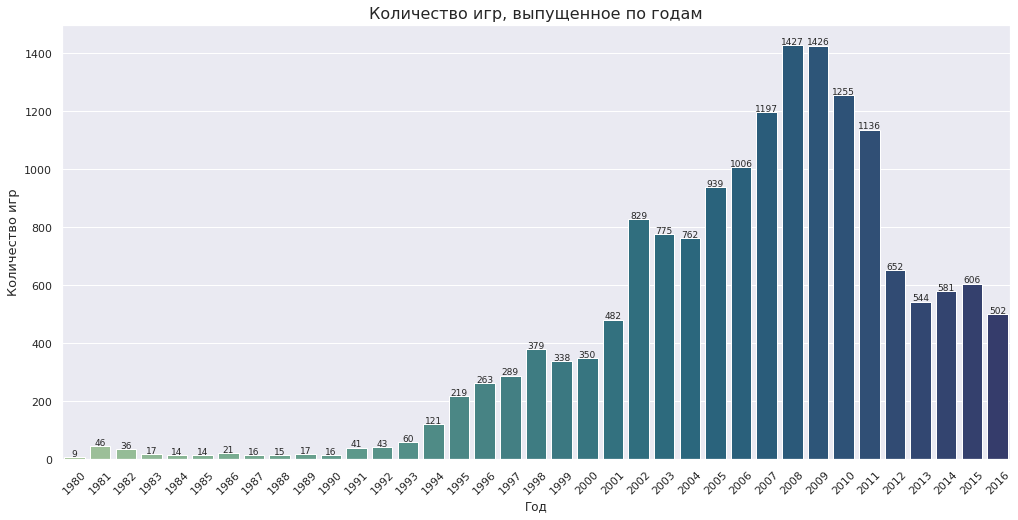

In [37]:
countplt, ax = plt.subplots(figsize = (17,8))
ax = sns.countplot(x = 'year_of_release', data = data, palette = 'crest')
ax.set_title('Количество игр, выпущенное по годам',fontsize = 16)
ax.set_xlabel('Год')
ax.set_ylabel('Количество игр', fontsize = 13)
for rect in ax.patches:
    ax.text (rect.get_x() + rect.get_width() / 2,
             rect.get_height() + 3,
             rect.get_height(),
             horizontalalignment='center', 
             fontsize = 9)
plt.xticks(rotation = 45)
plt.show()

**Что видим**

* с **1980** по **2009** виден значительный рост кол-ва игр
* с **2009** по **2016** виден спад кол-ва игр
* **2008** и **2009** года стали самыми успешными по количеству выпущенных игр (**1425** и **1426** соответственно). После этого периода наблюдается спад и в **2012** году количество релизов значительно сократилось до **652** игр (по сравнению с **2011** годом практически в 2 раза).

Посмотрим на продажи по годам

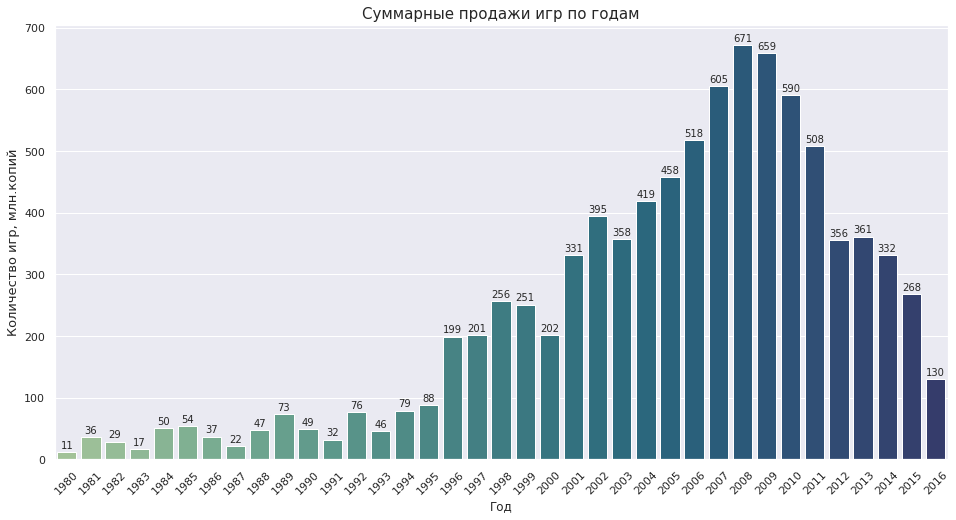

In [38]:
sby = data.groupby('year_of_release').agg({'global_sales':'sum'}).reset_index()
barplot, ax = plt.subplots(figsize = (16,8))
ax = sns.barplot(x = 'year_of_release', y = 'global_sales', data = sby, palette = 'crest')
ax.set_title('Суммарные продажи игр по годам',fontsize = 15)
ax.set_xlabel('Год')
ax.set_ylabel('Количество игр, млн.копий', fontsize = 13)
rects = ax.patches
labels = [round(sby['global_sales'][i]) for i in range(len(rects))]
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(
        rect.get_x() + rect.get_width() / 2, height + 3, label, ha="center", va="bottom", fontsize = 10
    )
plt.xticks(rotation = 45)
plt.show()


Визуально графики похожи, значительный рост в продажах начинается с **1996 года**. **2008** и **2009** года лидируют по продажам игр (**более 650 млн. копий**). После **2011** года наблюдается спад вплоть до **2016** года.

## Изменение продаж по платформам

Сначала посмотрим какое количество игр вышло на каждой платформе за весь представленый период.

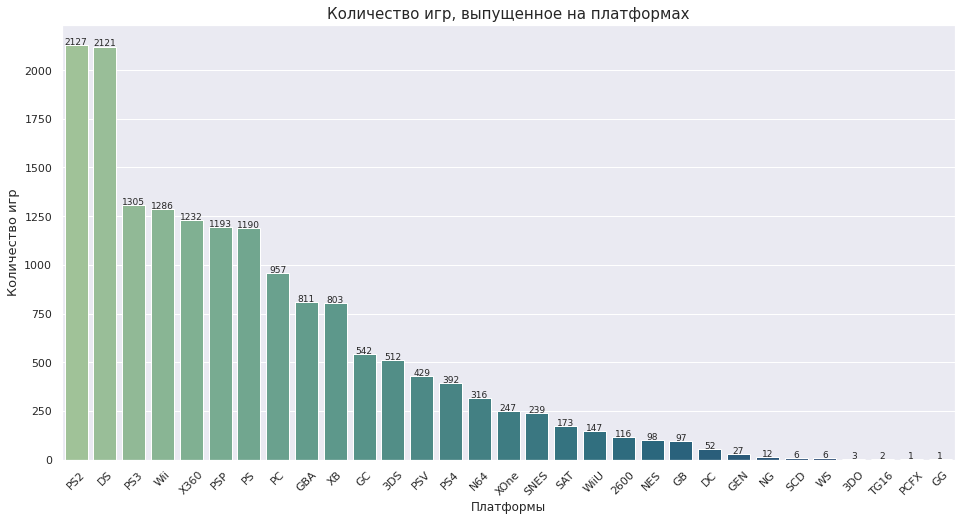

In [39]:
countplt, ax = plt.subplots(figsize = (16,8))
ax = sns.countplot(x = 'platform', data = data, order = data['platform'].value_counts().index, palette = 'crest')
ax.set_title('Количество игр, выпущенное на платформах',fontsize = 15)
ax.set_xlabel('Платформы')
ax.set_ylabel('Количество игр', fontsize = 13)
for rect in ax.patches:
    ax.text (rect.get_x() + rect.get_width() / 2,
             rect.get_height() + 3,
             rect.get_height(),
             horizontalalignment='center', 
             fontsize = 9)
plt.xticks(rotation = 45)
plt.show()

**Что видим**
* Больше всего игр на `PS2` и `DS`(**2126** и **2121**)
* Меньше всего на `GG` и `PCFX`

Посмотрим на суммарные продажи игр по платформам.

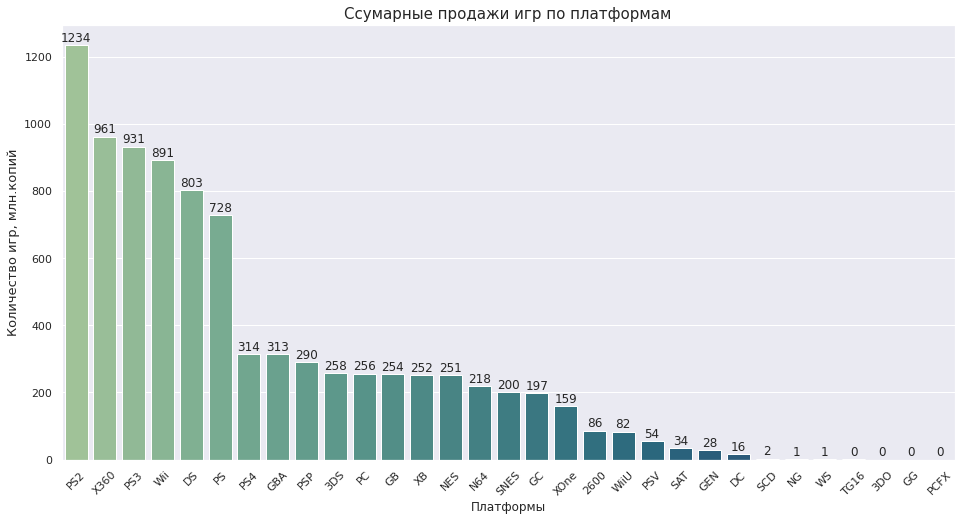

In [40]:
sbp = data.groupby('platform').agg({'global_sales':'sum'}).sort_values(by='global_sales', ascending=False).reset_index()
barplot, ax = plt.subplots(figsize = (16,8))
ax = sns.barplot(x = 'platform', y = 'global_sales', data = sbp, palette = 'crest')
ax.set_title('Ссумарные продажи игр по платформам',fontsize = 15)
ax.set_xlabel('Платформы')
ax.set_ylabel('Количество игр, млн.копий', fontsize = 13)
rects = ax.patches
labels = [round(sbp['global_sales'][i]) for i in range(len(rects))]
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(
        rect.get_x() + rect.get_width() / 2, height + 3, label, ha="center", va="bottom"
    )
plt.xticks(rotation = 45)
plt.show()

**Что видим**
* Среди всех регионов по ссумарным продажам лидирует платформа `PS2` - более **1млрд** проданных копий
* Далее идут платформы `X360` и `PS3` ~ **900 млн.копий**, `Wii` и `DS` ~ **800 млн.копий** и замыкает шестерку лидеров платформа `PS` - **728 млн.** проданных копий игр
* У остальных игр показатель ссумарных продаж значительно ниже. Здесь также можно отметить что пятерка лидеров по количеству выпущенных игр и по количеству проданных копий совпадает

Для шести лидирующих платформ по ссумарным продажам построим распределения по годам.

In [41]:
six_platforms = data.query('platform in ["PS2", "X360", "PS3", "Wii", "DS", "PS"]')

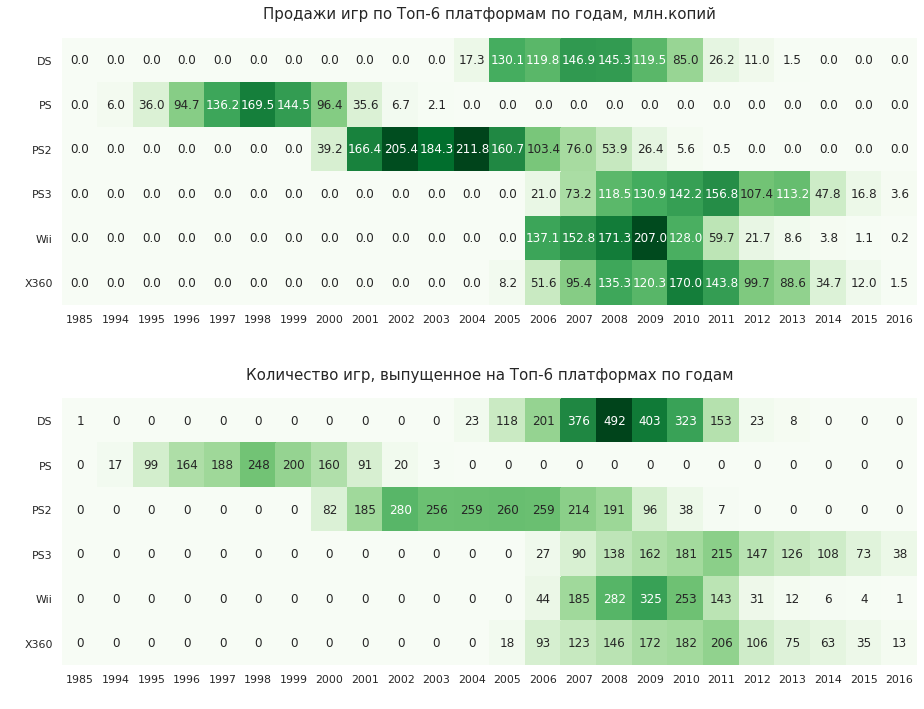

In [42]:
plt.figure(figsize=(13, 10))
ax1 = plt.subplot(2, 1, 1)
sns.heatmap((six_platforms
             .pivot_table(index='year_of_release', columns='platform', values='global_sales', aggfunc='sum')
             .fillna(0)).T, 
            annot=True, cmap='Greens', fmt='.1f', cbar=False, ax=ax1)
plt.title('Продажи игр по Топ-6 платформам по годам, млн.копий', fontsize = 15, y = 1.05)
plt.xlabel(' ')
plt.ylabel(' ')
plt.yticks(rotation = 0)
ax2 = plt.subplot(2, 1, 2)
sns.heatmap((six_platforms
             .pivot_table(index='year_of_release', columns='platform', values='name', aggfunc='count')
             .fillna(0)).T, 
            annot=True, cmap='Greens', fmt='.0f', cbar=False, ax=ax2)
plt.title('Количество игр, выпущенное на Топ-6 платформах по годам', fontsize = 15, y = 1.05)
plt.xlabel(' ')
plt.ylabel(' ')
plt.yticks(rotation = 0)
plt.tight_layout()
plt.subplots_adjust(hspace = 0.35)
plt.show() 

**Для наглядности построим линейный график по продажам по всем годам.**

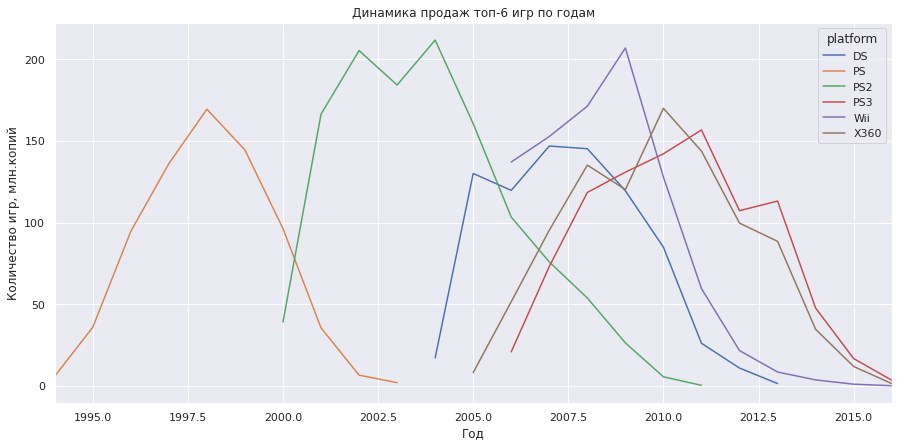

In [43]:
(six_platforms
 .pivot_table(index='year_of_release', columns='platform', values='global_sales', aggfunc='sum')
 .plot(grid = True, figsize=(15,7))
)
plt.title('Динамика продаж топ-6 игр по годам')
plt.xlabel('Год')
plt.ylabel('Количество игр, млн.копий')
plt.xlim(1994, 2016)
plt.show()

**Что видим**

* на графиках хорошо виден **"срок жизни"** различных платформ
* в среднем, среди топ-6 платформ, максимальные продажи игр приходятся на **5й** год выпуска платформы
* отрезок выпуска игр на платформе занимает в среднем **10-11 лет**

In [44]:
# Комментарий ревьюера
temp = data.copy() 
time_life = temp.pivot_table(index='platform', values='year_of_release', aggfunc=['min', 'max']).reset_index()
time_life['life'] = time_life['max'] - time_life['min'] + 1 # в срок жизни платформы, должны входить границы диапазона, 
                                                            # поэтому +1
time_life['life'].median()

7.0

**Прогноз**

Для того чтобы грамотно спрогназировать динамику к **2017 году**, нам необходимо определить актуальный период или срок "популярности" платформы.


Для этого вычислим объем продаж по всем платформам по годам, найдем медианное значение продаж по платформам, отфильтруем по этому значению платформы и посчитаем медианное количество лет

Группируем данные по платформам и годам

In [45]:
y_p_s = data.groupby(['platform', 'year_of_release']).agg({'global_sales':'sum'}).reset_index()
y_p_s.head(15)

,platform,year_of_release,global_sales
0,2600,1980,11.38
1,2600,1981,35.68
2,2600,1982,28.88
3,2600,1983,5.84
4,2600,1984,0.27
5,2600,1985,0.45
6,2600,1986,0.67
7,2600,1987,1.94
8,2600,1988,0.74
9,2600,1989,0.63


Найдем медианное значение ссумарных продаж по платформам

In [46]:
y_p_s.groupby('platform')['global_sales'].median().median()

17.559999999999995

 Медианные продажи по платформам  **17.6 млн. копий**

Отфильтруем данные по медианному значению и рассчитаем медианный срок "популярности" платформ

In [47]:
y_p_s.query('global_sales > 17.6').groupby(['platform']).agg({'year_of_release':'nunique'}).median()

year_of_release    5.0
dtype: float64

 Медианный срок популярности платформ  **5 лет**

**Вывод**

Полученные значения соответствуют данным на графиках

## Платформы и актуальный период

Отфильтруем данные по году

In [48]:
act_period = data.query('year_of_release >= 2013')


</font><font color='Blue'><b>Взял другой период</b></font><br>


In [49]:
act_period.shape

(2233, 12)

Всего в наших данных **2233 запись** за актуальный период.

Рассмотрим количество выпущенных игр и мировые продажи за актуальный период по платформам.

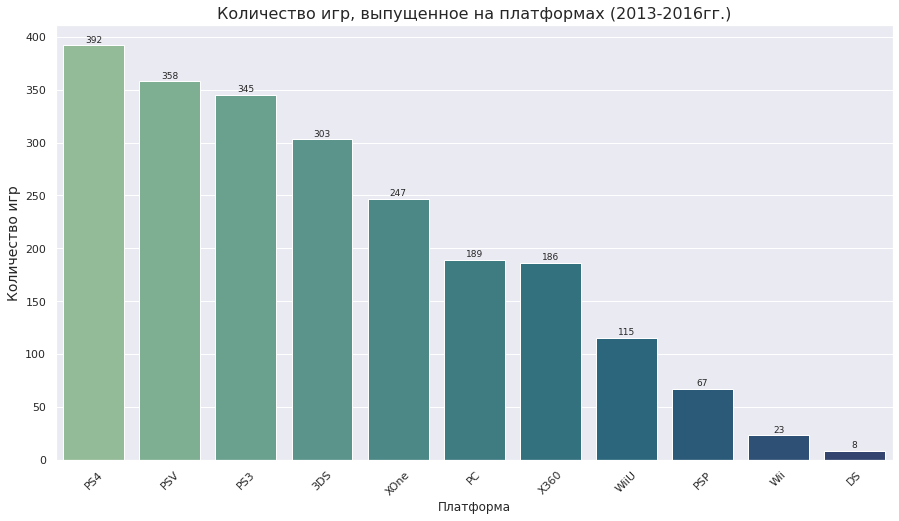

In [50]:
countplt, ax = plt.subplots(figsize = (15,8))
ax = (sns
      .countplot(x = 'platform', data = act_period, order = act_period['platform']
                 .value_counts()
                 .index, 
                 palette = 'crest'))
ax.set_title('Количество игр, выпущенное на платформах (2013-2016гг.)',fontsize = 16)
ax.set_xlabel('Платформа')
ax.set_ylabel('Количество игр', fontsize = 14)
for rect in ax.patches:
    ax.text (rect.get_x() + rect.get_width() / 2,
             rect.get_height() + 3,
             rect.get_height(),
             horizontalalignment='center', 
             fontsize = 9)
plt.xticks(rotation = 45)
plt.show()

**Что видим**

* по количеству выпущенных игр за актуальный период ледирует платформа `PS4` (**392 игры**)
* меньше всего игр вышло на `DS`

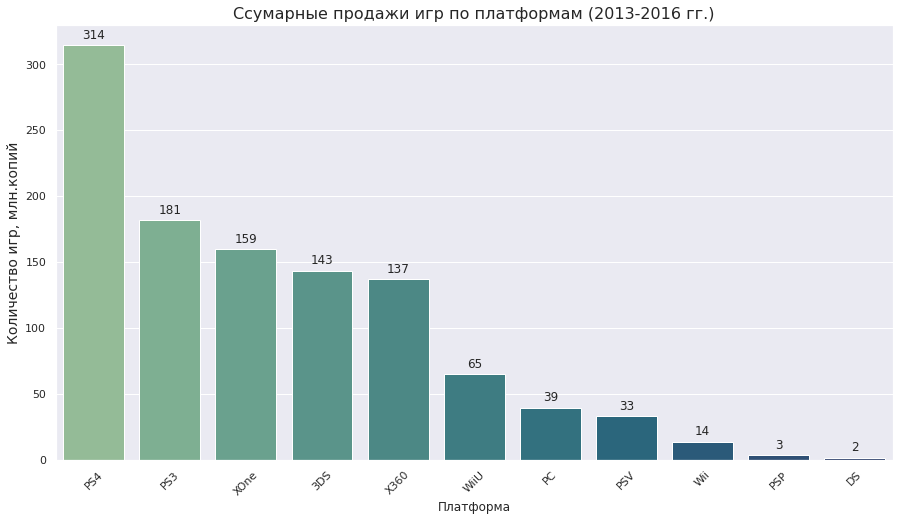

In [51]:
asbp = (act_period
       .groupby('platform')
       .agg({'global_sales':'sum'})
       .sort_values(by='global_sales', ascending=False)
       .reset_index()
      )
barplot, ax = plt.subplots(figsize = (15,8))
ax = sns.barplot(x = 'platform', y = 'global_sales', data = asbp, palette = 'crest')
ax.set_title('Ссумарные продажи игр по платформам (2013-2016 гг.)',fontsize = 16)
ax.set_xlabel('Платформа')
ax.set_ylabel('Количество игр, млн.копий', fontsize = 14)
rects = ax.patches
labels = [round(asbp['global_sales'][i]) for i in range(len(rects))]
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(
        rect.get_x() + rect.get_width() / 2, height + 3, label, ha="center", va="bottom"
    )
plt.xticks(rotation = 45)
plt.show()

**Что видим**
* по количеству выпущенных игр и по их продажам лидирует платформа `PS4`, далее второе место занимает платформа `PS3`
* платформа `XOne` занимает почетное **третье место**, что вероятно говорит о ее растущей популярности
* замыкает четверку платформа `DS`, находившаяся на втором месте по количеству игр, что в данном случае, наоборот, может говорить о том, что платформа находится на стадии угасания своей популярности.

Посмотрим на динамику продаж по годам

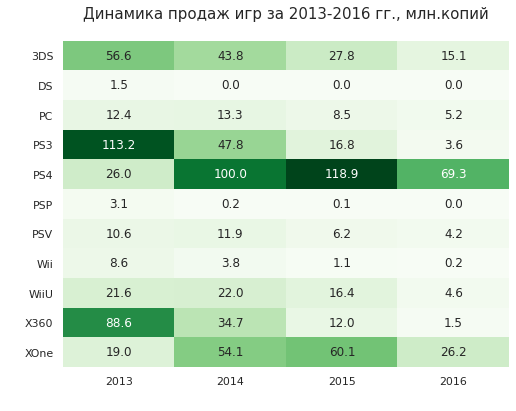

In [52]:
plt.figure(figsize=(8, 6))
sns.heatmap((act_period
             .pivot_table(index='year_of_release', columns='platform', values='global_sales', aggfunc='sum')
             .fillna(0)).T, 
            annot=True, cmap='Greens', fmt='.1f', cbar=False)
plt.title('Динамика продаж игр за 2013-2016 гг., млн.копий', fontsize = 15, y = 1.05)
plt.xlabel(' ')
plt.ylabel(' ')
plt.yticks(rotation = 0)
plt.show() 

**Что видим**
* Для всех платформ наблюдается снижение продаж к **2016** году
* К концу нашего актуального периода платформы `DS`, `PS2`, `PSP` и `Wii` показывают совсем незначительные значения продаж, популярность для данных платформ практически сошла на нет
* Довольно неплохо себя показывают платформы `PC`, `PSV`, `WiiU` - в **2016** году продажи составляли **4-5 млн. копий**
* Платформы `PS4` и `XOne` являются потенциально прибыльными, вышедшие в релиз в **2013** году, их пик популярности как раз будет приходится на **2017-2018** года. Сюда также можно добавить платформу `3DS`, которая на протяжении всего актуального периода показывает неплохие результаты

**Для пятерки лидеров по глобальным продажам в актуальном периоде (PS3, PS4, X360, XOne и 3DS) построим график boxplot (или ящик с усами)**

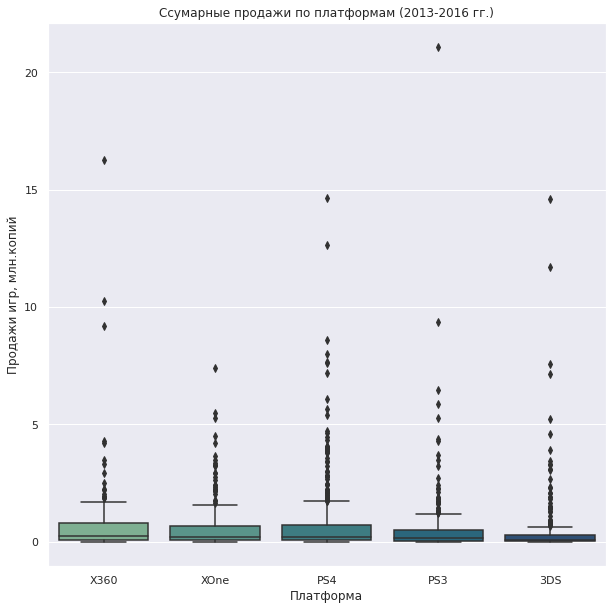

In [53]:
median_by_column = (act_period
                  .query('platform in ["3DS", "PS3", "PS4", "X360", "XOne"]')
                  .groupby(['platform'])['global_sales']
                  .median()
                  .sort_values(ascending=False))
plt.figure(figsize=(10,10))
sns.boxplot(x = 'platform', 
            y = 'global_sales', 
            data = act_period.query('platform in ["3DS", "PS3", "PS4", "X360", "XOne"]'), 
            palette = 'crest', 
            order = median_by_column.index)
plt.title('Ссумарные продажи по платформам (2013-2016 гг.)')
plt.xlabel('Платформа')
plt.ylabel('Продажи игр, млн.копий')
plt.show()

Мы можем наблюдать большое количество выбросов, в данном случае это наиболее успешные и популярные игры для каждой платформы

Рассмотрим график без выбивающихся значений


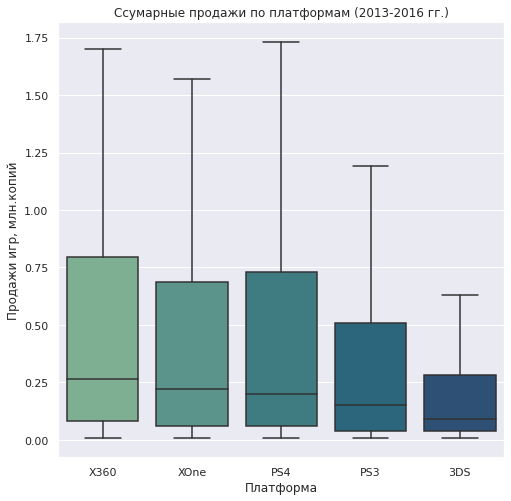

In [54]:
plt.figure(figsize=(8,8))
sns.boxplot(x = 'platform', 
            y = 'global_sales', 
            data = act_period.query('platform in ["3DS", "PS3", "PS4", "X360", "XOne"]'), 
            palette='crest', 
            showfliers=False, 
            order=median_by_column.index)
plt.title('Ссумарные продажи по платформам (2013-2016 гг.)')
plt.xlabel('Платформа')
plt.ylabel('Продажи игр, млн.копий')
plt.show()

* Самые высокие верхние границы "ящиков" у платформ `X360` и `PS4` (**~ 1.75 млн.копий**), что в очередной раз подтверждает их популярность в продажах.
* По медианному значению суммарных продаж игр за актуальный период лидирует платформа `X360`, следом идет платформа `PS4`, медианы платформы `XONE` и `PS4` находятся приблизительно на одном уровне, что может объясняться их "заменяемостью" в актуальном периоде - у `PS3` продажи снижаются, когда выходит следующая и набирает обороты по популярности и продажам.

## Влияние отзывов пользователей и критиков на продажи

Рассмотрим влияние отзывов пользователей и критиков на продажи в актуальном периоде

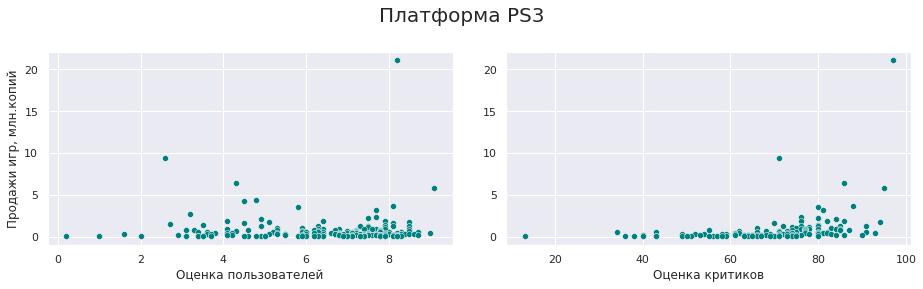

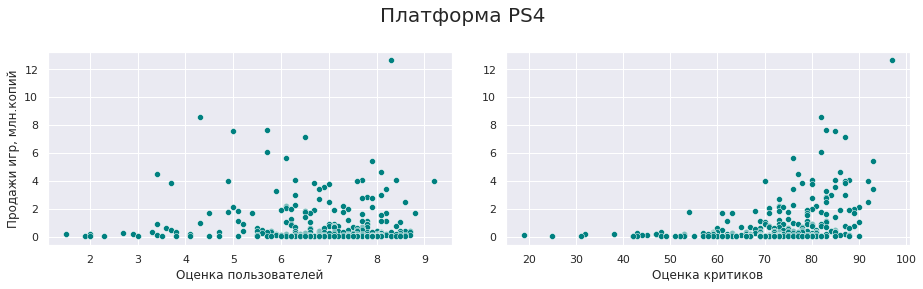

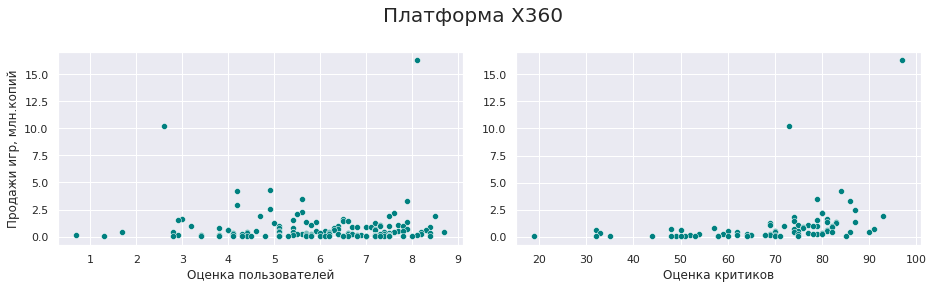

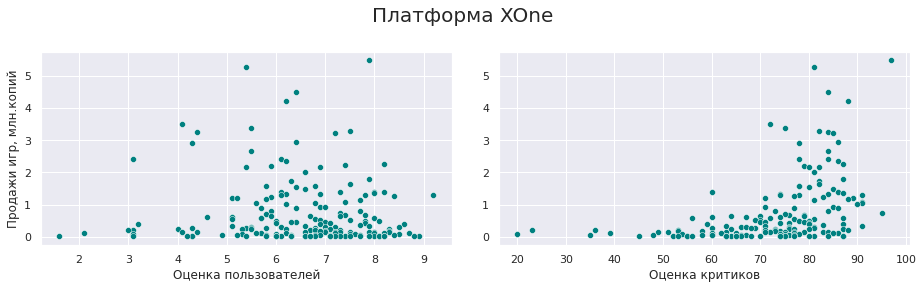

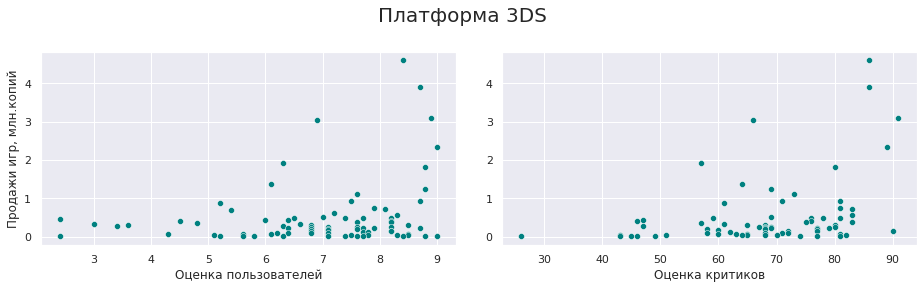

In [55]:
for platform in ['PS3', 'PS4', 'X360', 'XOne', '3DS']:
    data = act_period[act_period['platform'] == platform]
    plt.figure(figsize=(13, 4))
    ax1 = plt.subplot(1, 2, 1)
    plt.suptitle(f'Платформа {platform}', fontsize=20, y=1)
    sns.scatterplot(data=data, x='user_score', y='global_sales', color = 'teal', ax=ax1)
    plt.xlabel('Оценка пользователей')
    plt.ylabel('Продажи игр, млн.копий')
    ax2 = plt.subplot(1, 2, 2)
    sns.scatterplot(data=data, x='critic_score', y='global_sales', color = 'teal', ax=ax2)
    plt.xlabel('Оценка критиков')
    plt.ylabel(' ')
    plt.tight_layout()
    plt.show()


На первый взгляд связь продаж с оценками вообще отсутствует.

Среди игроков наблюдается приблизительно та же картина, чаще игры оценивались в **7-8 баллов** и только единицы получали **9 баллов** и выше.
Интересно, что игры с низкими оценками пользователей (**3-4 балла**) имеют высокие показатели продаж.

Рассчитаем коэффициенты корреляции

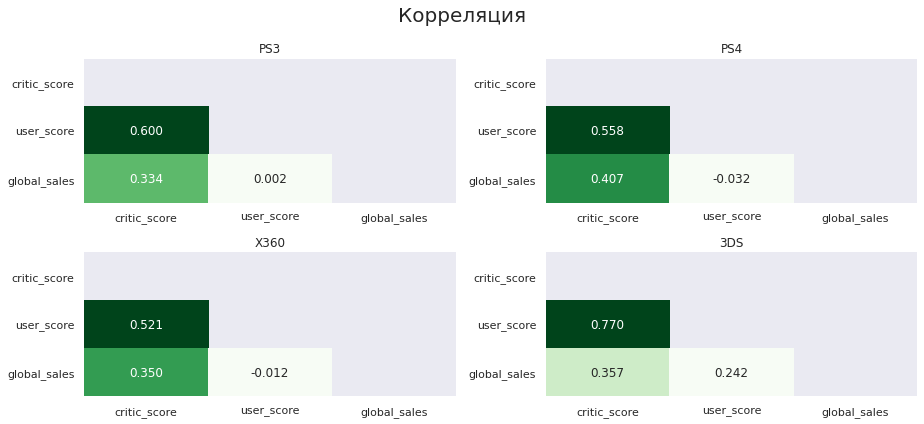

In [56]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(13, 6))
fig.suptitle('Корреляция', fontsize=20)
for platform, ax in zip(['PS3', 'PS4', 'X360', '3DS'], axes.ravel()):
    data = act_period[act_period['platform'] == platform]
    mask = np.triu(data[['critic_score', 'user_score', 'global_sales']].corr())
    (sns.heatmap(data[['critic_score', 'user_score', 'global_sales']].corr(), 
                 annot=True, mask=mask, cbar=False, cmap='Greens', fmt='.3f', ax=ax))
    ax.set_title(platform, fontsize=12)
plt.tight_layout()
plt.show()

Действительно, связь между продажами игр и оценкой пользователей отсутствует 
Умеренная связь между оценкой критиков и продажами по всем платформам, что говорит о влиянии отзывов критиков на продажи.
Коэффициент корреляции показывает заметную связь между отзывами критиков и пользователей по всем платформам

Поскольку в наших данных имеются сильновыбивающиеся значения, воспользуемся еще ранговой корреляцией Спирмана, которая используется для измерения корреляции между двумя ранжированными переменными (такие как оценки) .

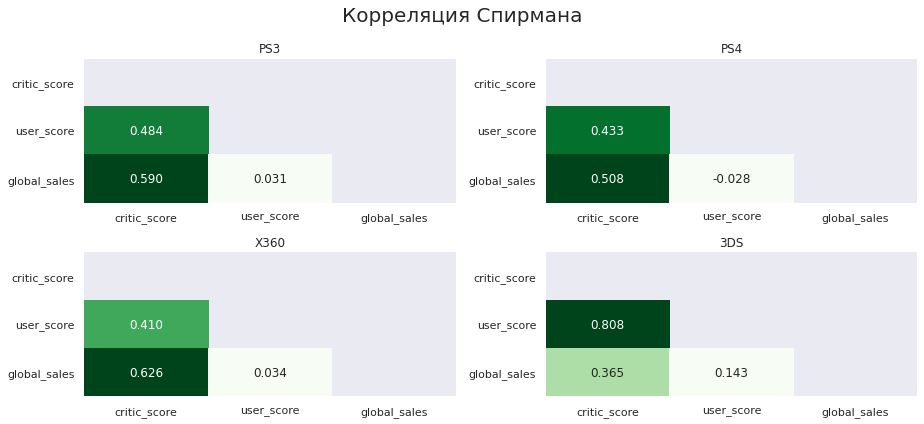

In [57]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(13, 6))
fig.suptitle('Корреляция Спирмана', fontsize=20)
for platform, ax in zip(['PS3', 'PS4', 'X360', '3DS'], axes.ravel()):
    data = act_period[act_period['platform'] == platform]
    mask = np.triu(data[['critic_score', 'user_score', 'global_sales']].corr(method='spearman'))
    (sns.heatmap(data[['critic_score', 'user_score', 'global_sales']].corr(method='spearman'), 
                 annot=True, mask=mask, cbar=False, cmap='Greens', fmt='.3f', ax=ax))
    ax.set_title(platform, fontsize=12)
plt.tight_layout()
plt.show()

В целом картина не изменилась, оценки пользователей не влияют на продажи, заметная корреляционная связь между отзывами критиков и игроков.

Посмотрим какое количество игр по каждой платформе в актуальном периоде получило максимальные оценки от критиков (**> 90 баллов**)

In [58]:
act_period[act_period['critic_score'] > 90].groupby('platform')['name'].count().sort_values(ascending=False)

platform
PC      6
PS3     6
XOne    6
PS4     5
WiiU    3
X360    3
3DS     1
PSV     1
Name: name, dtype: int64

Больше всего успехов у `PC`,`PS3` и `XOne`(**по 6**) , меньше всего у `3DS`, `PSV`, (**по 1**)

Посмотрим на максимальные продажи среди игр, получивших высокую оценку критиков.

In [59]:
(
    act_period[act_period['critic_score'] > 90]
    .groupby(['name', 'platform'])['global_sales']
    .sum()
    .nlargest(10)
    .reset_index()
)


,name,platform,global_sales
0,Grand Theft Auto V,PS3,21.05
1,Grand Theft Auto V,X360,16.27
2,Grand Theft Auto V,PS4,12.62
3,The Last of Us,PS3,5.86
4,Grand Theft Auto V,XOne,5.47
5,Uncharted 4: A Thief's End,PS4,5.39
6,Super Mario 3D World,WiiU,4.32
7,The Witcher 3: Wild Hunt,PS4,3.97
8,Metal Gear Solid V: The Phantom Pain,PS4,3.42
9,The Legend of Zelda: A Link Between Worlds,3DS,3.10


Среди высокооценённых игр оказалась `GTA V`, причём сразу на 3х платформах: `PS3`, `X360`, `PS4`, что впрочем не удивительно - игра топ! 

Уберем фильтрацию по оценке критиков и сравним с продажами игр в общей массе за актуальный период

In [60]:
act_period.groupby(['name', 'platform'])['global_sales'].sum().nlargest(10).reset_index()

,name,platform,global_sales
0,Grand Theft Auto V,PS3,21.05
1,Grand Theft Auto V,X360,16.27
2,Call of Duty: Black Ops 3,PS4,14.63
3,Pokemon X/Pokemon Y,3DS,14.60
4,Grand Theft Auto V,PS4,12.62
5,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,11.68
6,Call of Duty: Ghosts,X360,10.24
7,Call of Duty: Ghosts,PS3,9.36
8,Minecraft,X360,9.18
9,FIFA 16,PS4,8.58


Игра `GTA V` также лидирует в продажах на платформах `PS3` и `X360`. Теперь на третьем месте по продажам игра  `Call of Duty: Black Ops 3` на `PS4`(Всегда удивлялся, как можно на консоли играть в соревновательные шутеры...), также можно отметить `Pokemon X/Pokemon Y` на 4ом месте на платформе `3DS`, которые до сих пор имеют свою фанатскую базу и не теряют актуальность по сей день(Релиз игры `Palworld` тому яркое доказательство)

Посмотрим на их оценки

In [61]:
act_period.query('name == "Grand Theft Auto V"')[['name', 'platform', 'user_score', 'critic_score', 'global_sales']]

,name,platform,user_score,critic_score,global_sales
16,Grand Theft Auto V,PS3,8.2,97.0,21.05
23,Grand Theft Auto V,X360,8.1,97.0,16.27
42,Grand Theft Auto V,PS4,8.3,97.0,12.62
165,Grand Theft Auto V,XOne,7.9,97.0,5.47
1710,Grand Theft Auto V,PC,7.9,96.0,1.17


In [62]:
(act_period
 .query('name == "Pokemon X/Pokemon Y"')
 [['name', 'platform', 'user_score', 'critic_score', 'global_sales']])

,name,platform,user_score,critic_score,global_sales
33,Pokemon X/Pokemon Y,3DS,NaN,NaN,14.6


In [63]:
act_period.query('name == "Call of Duty: Black Ops 3"')[['name', 'platform', 'user_score', 'critic_score', 'global_sales']]

,name,platform,user_score,critic_score,global_sales
31,Call of Duty: Black Ops 3,PS4,NaN,NaN,14.63
99,Call of Duty: Black Ops 3,XOne,NaN,NaN,7.39
1038,Call of Duty: Black Ops 3,X360,NaN,NaN,1.70
1051,Call of Duty: Black Ops 3,PS3,NaN,NaN,1.69
6363,Call of Duty: Black Ops 3,PC,NaN,NaN,0.26


**Что видим**
* `GTA V` была высоко оценена не только критиками, но и пользователями (**~ 8 баллов**)
* у игр `Call of Duty: Black Ops 3` и `Pokemon X/Pokemon Y` отзывы критиков и пользователей отсутствуют

## Жанры игр и актуальный период

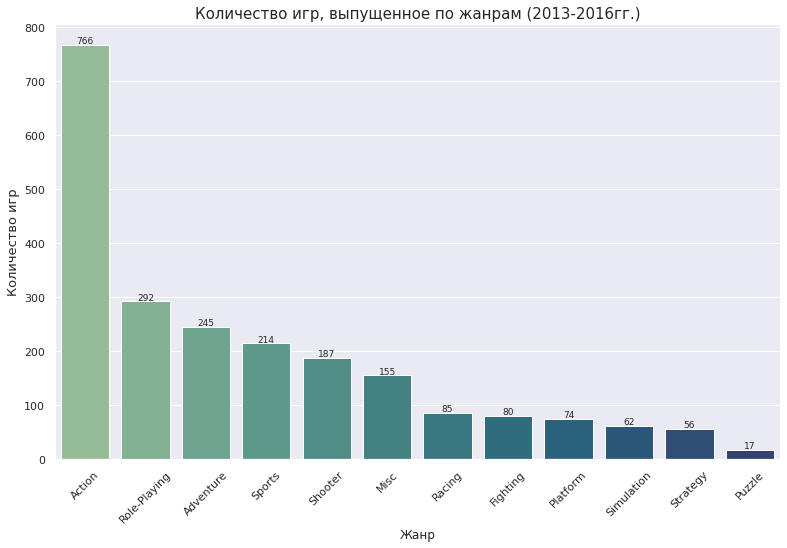

In [64]:
countplt, ax = plt.subplots(figsize = (13,8))
ax = (sns
      .countplot(x = 'genre', data = act_period, order = act_period['genre']
                 .value_counts()
                 .index, 
                 palette = 'crest'))
ax.set_title('Количество игр, выпущенное по жанрам (2013-2016гг.)',fontsize = 15)
ax.set_xlabel('Жанр')
ax.set_ylabel('Количество игр', fontsize = 13)
for rect in ax.patches:
    ax.text (rect.get_x() + rect.get_width() / 2,
             rect.get_height() + 3,
             rect.get_height(),
             horizontalalignment='center', 
             fontsize = 9)
plt.xticks(rotation = 45)
plt.show()

Всего за актуальный период представлено **12** различных жанров игр. Больше всего было выпущенно игр в жанре `Action`**766 игр**), меньше всего игр было выпущено в жанре `Puzzle`(**17**)

Посмотрим на продажи по жанрам.

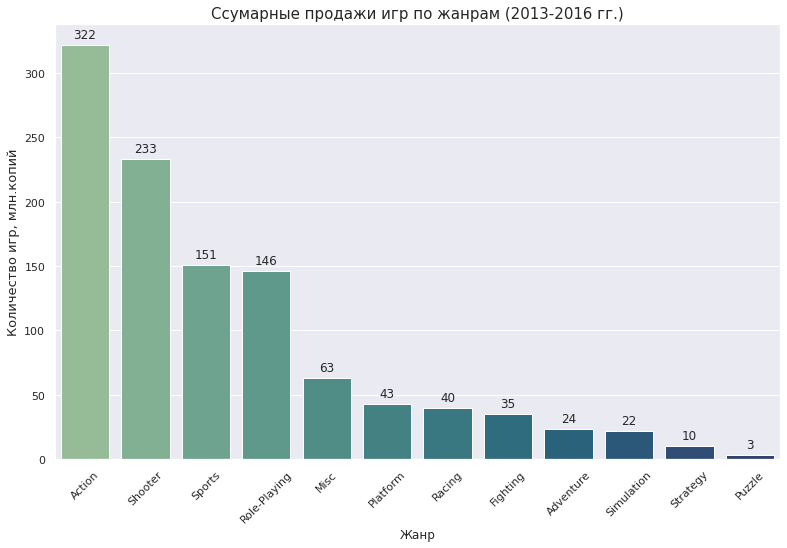

In [65]:
asbg = (act_period
       .groupby('genre')
       .agg({'global_sales':'sum'})
       .sort_values(by='global_sales', ascending=False)
       .reset_index()
      )
barplot, ax = plt.subplots(figsize = (13,8))
ax = sns.barplot(x = 'genre', y = 'global_sales', data = asbg, palette = 'crest')
ax.set_title('Ссумарные продажи игр по жанрам (2013-2016 гг.)',fontsize = 15)
ax.set_xlabel('Жанр')
ax.set_ylabel('Количество игр, млн.копий', fontsize = 13)
rects = ax.patches
labels = [round(asbg['global_sales'][i]) for i in range(len(rects))]
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(
        rect.get_x() + rect.get_width() / 2, height + 3, label, ha="center", va="bottom"
    )
plt.xticks(rotation = 45)
plt.show()

**Что видим**

* Жанр `Action` лидирует и по количеству проданных копий (**322 миллионов**)
* На второе место по продажам (**233 млн.копий**) выходит жанр `Shooter` (занимающий **5-е место** по количеству выпущенных игр), что явно говорит о популярности игр в данном жанре.
* Третье и четвертое место, приблизительно с равными продажами, занимают жанры `Role-Playing` и `Sports` (**~ 240 млн.копий**)
* Самые низкие продажи у жанров `Strategy` (**10 млн.копий**) и `Puzzle` (**3 млн.копий**)

Рассмотрим медианные продажи игр по жанрам. Построим график boxplot

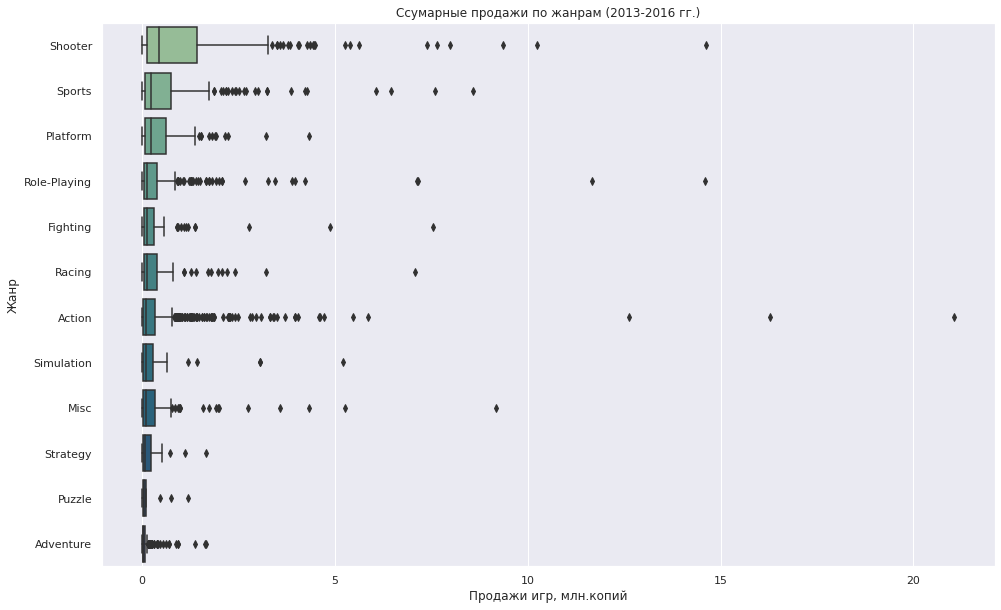

In [66]:
median_by_column = (act_period
                  .groupby(['genre'])['global_sales']
                  .median()
                  .sort_values(ascending=False))
plt.figure(figsize=(16,10))
sns.boxplot(x = 'global_sales', 
            y = 'genre', 
            data = act_period, 
            palette = 'crest', 
            order = median_by_column.index)
plt.title('Ссумарные продажи по жанрам (2013-2016 гг.)')
plt.xlabel('Продажи игр, млн.копий')
plt.ylabel('Жанр')
plt.show()

Опять же видим большое количество выбивающихся значений, это игры набравшие наибольшую популярность после их релиза.

Рассмотрим график более близко

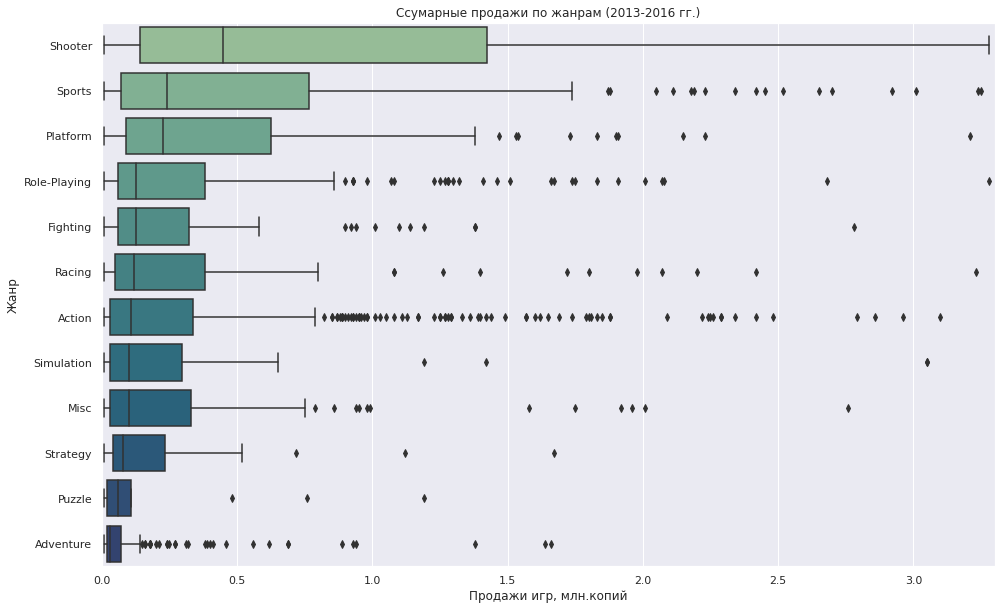

In [67]:
median_by_column = (act_period
                  .groupby(['genre'])['global_sales']
                  .median()
                  .sort_values(ascending=False))
plt.figure(figsize=(16,10))
sns.boxplot(x = 'global_sales', 
            y = 'genre', 
            data = act_period, 
            palette = 'crest', 
            order = median_by_column.index)
plt.title('Ссумарные продажи по жанрам (2013-2016 гг.)')
plt.xlabel('Продажи игр, млн.копий')
plt.ylabel('Жанр')
plt.xlim(0, 3.3)
plt.show()

**Что видим**

* На первое место выходит жанр `Shooter`, у него самый высокий показатель медианных продаж и самый широкий размах (**~ 0.2 - 1.4 млн. копий**)
* Жанр `Action`, лидирующий как по количеству выпущенных игр, так и по продажам в актуальном периоде, по медианному значению занимает **7-е место**, что говорит о его успешности только за счет выпущенных бестселлеров
* Жанры `Puzzle` и `Adventure` находятся внизу рейтинга

Поссмотрим на самые продаваемые игры по жанрам за актуальный период.

In [68]:
act_period.groupby(['name', 'genre'])['global_sales'].sum().nlargest(10).reset_index()

,name,genre,global_sales
0,Grand Theft Auto V,Action,56.58
1,Call of Duty: Ghosts,Shooter,27.39
2,Call of Duty: Black Ops 3,Shooter,25.67
3,Minecraft,Misc,24.16
4,Call of Duty: Advanced Warfare,Shooter,21.97
5,FIFA 15,Sports,17.37
6,FIFA 14,Sports,16.46
7,FIFA 16,Sports,16.30
8,Pokemon X/Pokemon Y,Role-Playing,14.60
9,Battlefield 4,Shooter,13.94


**Что видим**
* В лидерах сохранилась `GTAV`(**56.58 млн.копий.**), появилась свежая на тот момент `Call of Duty: Ghosts`(**27.4 миллионов**) 
* В жанре `Misc` самая популярная игра `Minecraft` (**24.16 млн.копий**)
* В жанре `Role-Playing` фаворит `Pokemon X/Pokemon Y` (**14.60 млн.копий**)
* В жанре `Sports` лидирует игра `FIFA 15` (**17.37 млн. копий**)(видимо 16 не успела набрать обороты)

**Выводы:**
1) **Игры за весь представленный период:**
   
* Массово игры начали выпускаться с **1995 года** (в наших данных период с **1980 по 2016 г**). **2008** и **2009** года стали самыми успешными как по количеству выпущенных игр (**1425** и **1426** соответственно) так и по мировым продажам (**более 650 млн. копий**), далее наблюдается спад вплоть до **2016 года**.
* Больше всего игр было выпущенно на платформах `PS4` (лидирует и по продажам за весь период). 
* "Срок жизни" платформы в среднем составляет **10-11 лет**, "срок популярности" в районе **5-6ти лет**.

2) **Отзывы пользователей и критиков:**

* Пользователи чаще оценивали игры в **7-8 баллов** и только единицы получали **9 баллов и выше**. В целом продажи не сильно зависят от оценок пользователей.
* Оценка критиков влияет на продажи, чем выше оценка, тем больше проданных копий. Основная масса оценок критиков находится в диапазоне **70-80** и лишь немногие игры смогли получить оценку больше **90 баллов**.
* Лидерам и по высокоретинговым играм стали `PC`,`PS3` и `XOne`(**по 6**) 
* Меньше всего таких игр у `3DS`, `PSV`, (**по 1**)

3) **Игры за актуальный период (2013-2016 гг.):**

* Как по количеству выпущенных игр (**392**), так и по их продажам (**314 млн.копий**) лидирует платформа `PS4`, далее второе место занимает платформа `PS3`.
* В динамике продаж по годам для всех платформ наблюдается снижение к **2016** году. Платформы `PS4` и `XOne` являются потенциально прибыльными, вышедшие в релиз в **2013 году**, их пик популярности как раз будет приходится на **2017-2018** года. Сюда также можно добавить платформы `3DS` и `X360`, которые на протяжении всего актуального периода показывают неплохие результаты.

4) **Жанры игр:**

* Всего за актуальный период представлено **12** различных жанров
* Больше всего было выпущенно игр в жанре `Action` (**766 игр**), он же лидирует и по количеству проданных копий (**322 миллионов**). На втором месте по продажам (**233 млн.копий**) жанр `Shooter` (занимающий **5-е место** по количеству выпущенных игр), что явно говорит о популярности игр в данном жанре. На 2ом месте находятся  жанр `Role-Playing`(**292 игры**), в рейтинге продаж он расположился на 4ой строчке(**146 млн.копий**)
* По медианным продажам первое место занимает жанр `Shooter`, у него самый высокий показатель медианных продаж и самый широкий размах (**~ 0.2 - 1.4 млн. копий**), второе и третье место занимают жанры `Sports` и `Platform`. Жанр `Action`, лидирующий как по количеству выпущенных игр, так и по продажам в актуальном периоде, по медианному значению занимает **7-е место**, что говорит о его успешности только за счет выпущенных бестселлеров. Жанр `Puzzle` стабильно находится внизу рейтинга, интересно что жанр `Adventure`, занимающий третье место по количеству выпущенных игр, по медианному значению продаж показывает себя хуже всех.
* Среди игр самая продаваемая игра `GTA V` в жанре `Action`, за актуальный период было продано **56.58 млн.копий**. Следом в жанре `Shooter` идет игра `Call of Duty: Ghosts` (**27.4 миллионов**). В жанре `Misc` самая популярная игра `Minecraft` (**24.16 млн.копий**), у жанра `Role-Playing` фаворит `Pokemon X/Pokemon Y` (**14.6 млн.копий**) и в жанре `Sport` лидирует игра `FIFA 15` (**17.37 млн. копий**).

# Шаг 3. Портрет пользователя для каждого региона

**Самые популярные платформы (Топ-5)**

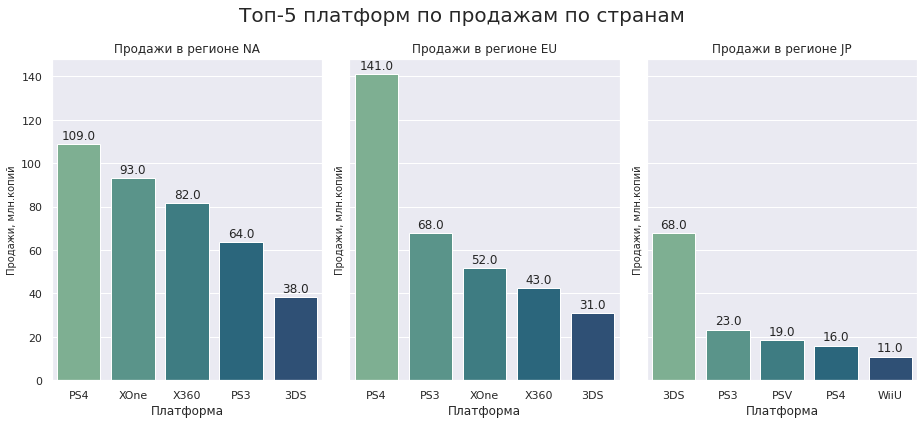

In [69]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(13, 6), sharey=True)
fig.suptitle('Топ-5 платформ по продажам по странам', fontsize=20)
for region, ax in zip(['na_sales', 'eu_sales', 'jp_sales'], axes.ravel()):
    top = act_period.pivot_table(index='platform', values=region, aggfunc='sum').reset_index().nlargest(5, region)
    sns.barplot(x = 'platform', y = region, data = top, palette = 'crest', ax=ax)
    rects = ax.patches
    labels = round(top[region])
    for rect, label in zip(rects, labels):
        height = rect.get_height()
        ax.text(
            rect.get_x() + rect.get_width() / 2, height + 1, label, ha="center", va="bottom")
    ax.set_title(f'Продажи в регионе {region.upper()[:2]}', fontsize=12)
    ax.set_ylabel('Продажи, млн.копий', fontsize=10)
    ax.set_xlabel('Платформа')
plt.tight_layout()
plt.show()

**Что видим**

* `Северная Америка` лидирует по ссумарным продажам, далее следует `Европа` и `Северная Америка`
* Платформа `PS4` лидирует в `Северной Америке` и `Европе` (**109 и 141 млн. копий** соответственно), портативная консоль `3DS` лидирует в `Японии` (**68 млн. копий**), когда в `Америке` она на пятом месте (**38 млн.**) и в `Европе` также на пятом месте (**31 млн.**)

Рассмотрим доли продаж топ-5 платформ в разрезе страны и по глобальным продажам

In [70]:
for region in ['na_sales', 'eu_sales', 'jp_sales']:
    top = (act_period
           .pivot_table(index='platform', values=[region, 'global_sales'], aggfunc='sum')
           .sort_values(by = region, ascending=False).reset_index())
    top['share_by_region'] = round(top[region]/top[region].sum()*100,1)
    top['global_share'] = round(top[region]/top['global_sales']*100,1)
    print(f'\n\033[1;34m Доля продаж игр на топ-5 платформах в регионе {region.upper()[:2]} \033[0m')
    display(top[['platform', 'share_by_region', 'global_share']].head())


 Доля продаж игр на топ-5 платформах в регионе NA 


,platform,share_by_region,global_share
0,PS4,24.8,34.6
1,XOne,21.3,58.4
2,X360,18.7,59.7
3,PS3,14.5,35.0
4,3DS,8.7,26.7



 Доля продаж игр на топ-5 платформах в регионе EU 


,platform,share_by_region,global_share
0,PS4,36.0,44.9
1,PS3,17.3,37.4
2,XOne,13.2,32.4
3,X360,10.8,31.1
4,3DS,7.9,21.6



 Доля продаж игр на топ-5 платформах в регионе JP 


,platform,share_by_region,global_share
0,3DS,48.2,47.3
1,PS3,16.6,12.9
2,PSV,13.2,56.4
3,PS4,11.3,5.1
4,WiiU,7.7,16.8


**Что видим**
* Основным рынком для игр на платформы `X360` является `Северная Америка`, на ее долю приходится **60%** глобальных продаж. Игры для  `PS4` лидируют в `Северной Америке` с долей **25%** среди всех игровых приставок. Следует отметить, что основным регионом для четвертой по продажам видеоигр приставки `XOne` также является `Северная Америка` с долей **58.4%** от мировых продаж. Таким образом компания `Microsoft` крайне успешна на рынке видеоигр в `Северной Америке`
* Позиции компании `Microsoft` менее сильны в европейском регионе, где основные продажи видеоигр приходятся на игровые приставки компании `Sony`: `PS3` - **37%**, `PS4` - **45%** от мировых продаж. Примечательно, что игры для `PC`, занимающие пятое место по популярности в регионе, имеют долю почти **60%** от мировых продаж.
* Как и было сказано ранее, портативные игровые консоли очень популярны в `Японии`, игры для `3DS` занимают **47%** глобальных продаж, а доля `PSV` - более **56%**. Стоит отметить, что среди топ-5 платформ представлены исключительно Японские игровые приставки и консоли.

**Самые популярные жанры (топ-5)**

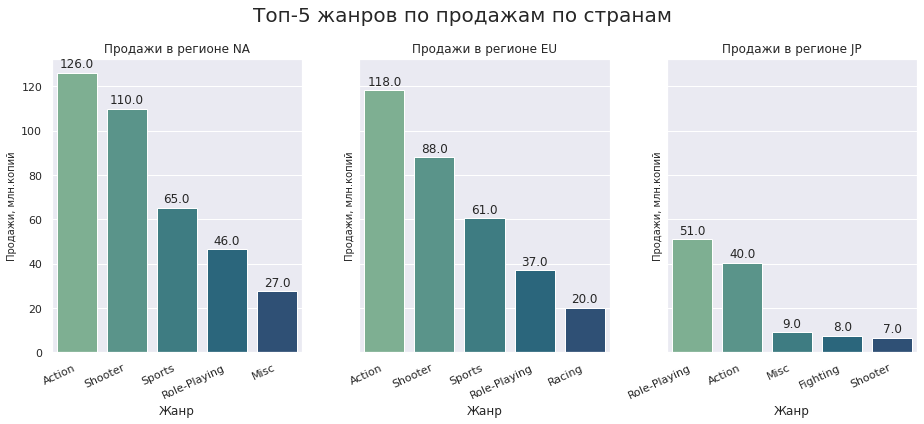

In [71]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(13, 6), sharey=True)
fig.suptitle('Топ-5 жанров по продажам по странам', fontsize=20)
fig.autofmt_xdate(rotation=25)
for region, ax in zip(['na_sales', 'eu_sales', 'jp_sales'], axes.ravel()):
    top = act_period.pivot_table(index='genre', values=region, aggfunc='sum').reset_index().nlargest(5, region)
    sns.barplot(x = 'genre', y = region, data = top, palette = 'crest', ax=ax)
    rects = ax.patches
    labels = round(top[region])
    for rect, label in zip(rects, labels):
        height = rect.get_height()
        ax.text(
            rect.get_x() + rect.get_width() / 2, height + 1, label, ha="center", va="bottom")
    ax.set_title(f'Продажи в регионе {region.upper()[:2]}', fontsize=12)
    ax.set_ylabel('Продажи, млн.копий', fontsize=10)
    ax.set_xlabel('Жанр')
plt.tight_layout()
plt.show()

По жанрам видеоигр рынки `Северной Америки` и `Европы` идентичны, тройка лидеров представлена жанрами `Action`, `Shooter` и `Sports`.
В `Японии` основные продажи приходятся на два жанра: `Role-Playing` и `Action`.

In [72]:
for region in ['na_sales', 'eu_sales', 'jp_sales']:
    top = (act_period
           .pivot_table(index='genre', values=[region, 'global_sales'], aggfunc='sum')
           .sort_values(by = region, ascending=False).reset_index())
    top['share_by_region'] = round(top[region]/top[region].sum()*100,1)
    top['global_share'] = round(top[region]/top['global_sales']*100,1)
    print(f'\n\033[1;34m Доля продаж игр по топ-5 жанрам в регионе {region.upper()[:2]} \033[0m')
    display(top[['genre', 'share_by_region', 'global_share']].head())


 Доля продаж игр по топ-5 жанрам в регионе NA 


,genre,share_by_region,global_share
0,Action,28.8,39.2
1,Shooter,25.1,47.1
2,Sports,14.9,43.3
3,Role-Playing,10.6,31.8
4,Misc,6.3,43.8



 Доля продаж игр по топ-5 жанрам в регионе EU 


,genre,share_by_region,global_share
0,Action,30.1,36.7
1,Shooter,22.4,37.7
2,Sports,15.4,40.2
3,Role-Playing,9.4,25.3
4,Racing,5.1,50.6



 Доля продаж игр по топ-5 жанрам в регионе JP 


,genre,share_by_region,global_share
0,Role-Playing,36.3,35.0
1,Action,28.8,12.6
2,Misc,6.5,14.6
3,Fighting,5.4,21.7
4,Shooter,4.7,2.8


**Что видим**
* На рынках `Северной Америки` и `Европы` наблюдаются схожие потребительские предпочтения в видеоиграх, в обоих регионах доли тройки лидеров распределены схожим образом: `Action` ~ **28%**, `Shooter` ~ **23%** и `Sports` - **13%**. При этом доли этих жанров в глобальных продажа также достаточно стабильны, для `Северной Америки` ~ **40%**, в `Европе` ~ **37%**.
* На долю самого популярного жанра в `Японии` `Role-Playing` приходиться треть мировых продаж.

**Рейтинг ESRB**

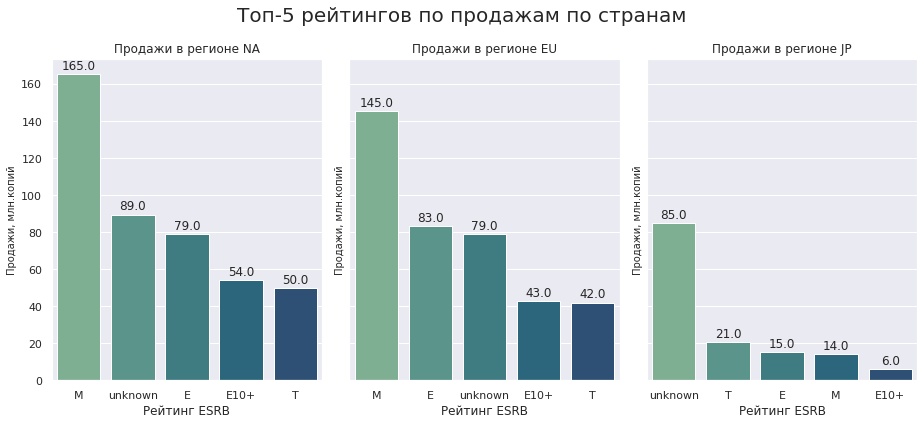

In [73]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(13, 6), sharey=True)
fig.suptitle('Топ-5 рейтингов по продажам по странам', fontsize=20)
for region, ax in zip(['na_sales', 'eu_sales', 'jp_sales'], axes.ravel()):
    top = act_period.pivot_table(index='rating', values=region, aggfunc='sum').reset_index().nlargest(5, region)
    sns.barplot(x = 'rating', y = region, data = top, palette = 'crest', ax=ax)
    rects = ax.patches
    labels = round(top[region])
    for rect, label in zip(rects, labels):
        height = rect.get_height()
        ax.text(
            rect.get_x() + rect.get_width() / 2, height + 1, label, ha="center", va="bottom")
    ax.set_title(f'Продажи в регионе {region.upper()[:2]}', fontsize=12)
    ax.set_ylabel('Продажи, млн.копий', fontsize=10)
    ax.set_xlabel('Рейтинг ESRB')
plt.tight_layout()
plt.show()

**Что видим**

* Доли продаж по рейтингам снова схожи между `Северной Америкой` и `Европой`, внутри регионов рейтинг `М` (mature 17+) занимает **37%**, рейтинг `E` (Everyone 0+) - **21%**, в глобальных продажах доли лидеров стабильны ~ **45%** в `Америке` и ~ **37%** в `Европе`
* В `Японии` рейтинг `unknown` лидирует с долей более **50%** поэтому он и лидирует по продажам в регионе. На втором месте рейтинг `Е` (Everyone 0+) с долей внутреннего рынка **15%**

Попробуем рассмотреть связи между рейтингами ESRB и продажами игр.

In [74]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

rating_corr = act_period.copy()
rating_corr = rating_corr.query('rating != "unknown"')

rating_corr['trans_rating'] = le.fit_transform(rating_corr['rating'])

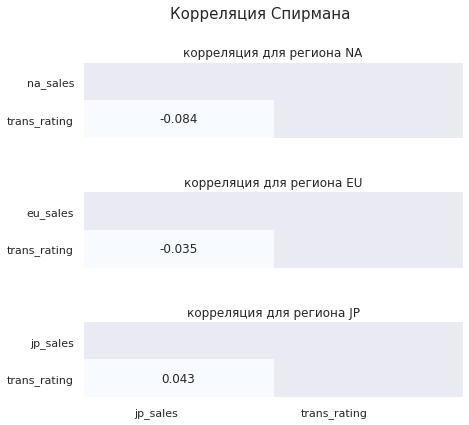

In [75]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(6, 6))
fig.suptitle('Корреляция Спирмана', fontsize=15)
fig.autofmt_xdate(rotation=0)
fig. tight_layout (h_pad= 4)
for region, ax in zip(['na_sales', 'eu_sales', 'jp_sales'], axes.ravel()):
    mask = np.triu(rating_corr[rating_corr[region]!=0][[region, 'trans_rating']].corr(method='spearman'))
    (sns.heatmap(rating_corr[rating_corr[region]!=0][[region, 'trans_rating']].corr(method='spearman'), 
                 annot=True, cbar=False, cmap='Blues', mask = mask, fmt='.3f', ax=ax))
    ax.set_title(f'корреляция для региона {region.upper()[:2]}', fontsize=12)
plt.subplots_adjust(top = 0.85)
plt.show()

Согласно расчетам коэффициента корреляции Спирмана, связи между рейтингами, выставленными агенством ESRB, и продажами игр **отсутствуют**.

**Выводы:**
**Портрет пользователя Японии:**

* рынок `Японии` значительно отличается от `Американского` и `Европейского`, среди топ-5 платформ представлены исключительно Японские игровые приставки и консоли, первое место в продажах у `3DS`. Доля игр для `PSV` занимает **более 56%** от глобальных продаж

* самый популярный жанг видеоигр - `Role-Playing`, на его долю приходиться треть мировых продаж. Второе место занимает `Action`

* среди рейтингов первое место занимает `unknown`, в данном случае есть два варианта, в наших данных это пропущенные значения, которые нам не удалось восполнить, либо, т.к. в `Японии` и `Европе` есть собственные рейтинговые организации (`PEGI` и `CERO`), выпускаемым играм не выставлялся рейтинг `ESRB`.

**Портрет пользователя Северной Америки:**

* самые популярные игры для платформы `PS4`, второе и третье место делять платформы `XOne` и `X360`. По доле продаж компания `Microsoft` крайне успешна на рынке видеоигр в `Северной Америке`: игры на платформе `X360` занимают **60%** глобальных продаж, а у `XOne` - **58.4%**

* жанровое предпочтение отдается `Action`, `Shooter` и `Sports`.

* самые продаваемые игры с рейтингами `М` (mature 17+) и `unknown` 

**Портрет пользователя Европы:**

* в лидерах продаж игры для платформы `PS4`, далее идут платформы `PS3` и `XOne`. Основные продажи видеоигр приходятся на игровые приставки компании `Sony`: `PS3` - **37%**, `PS4` - **45%** от мировых продаж, а игры для `PC` имеют долю почти **60%** от мировых продаж

* среди жанров вкусы пользователей схожи с `Северной Америкой`, лидеры - `Action`, `Shooter` и `Sports`

* среди рейтингов также лидируют игры для взрослых `М` (mature 17+) и для детской аудитории `E`(Everyone 0+)



# Шаг 4. Проверка гиротез

**Гипотеза 1. Средние пользовательские рейтинги платформ `Xbox One` и `PC` одинаковые.**

Сформулируем нулевую и альтернативную гипотезы:

**H0** : средние пользовательские рейтинги платформ `Xbox One` и `PC` одинаковые

**H1** : средние пользовательские рейтинги платформ `Xbox One` и `PC `различаются

Для проверки данной гипотезы воспользуемся t-тестом (scipy.stats.ttest_ind()).

Уровень статистической значимости примем равным **5%**.

Создадим две выборки с рейтингами пользователей по необходимым платформам и избавимся от отсутствующих значений.

In [76]:
xbox = act_period.query('platform == "XOne"').dropna(subset=['user_score'])
pc = act_period.query('platform == "PC"').dropna(subset=['user_score'])

In [77]:
print('Размер выборки для платформы \033[1;30mXbox One:\033[0m', len(xbox))
print('Размер выборки для платформы \033[1;30mPC:\033[0m', len(pc))

Размер выборки для платформы Xbox One: 182
Размер выборки для платформы PC: 155


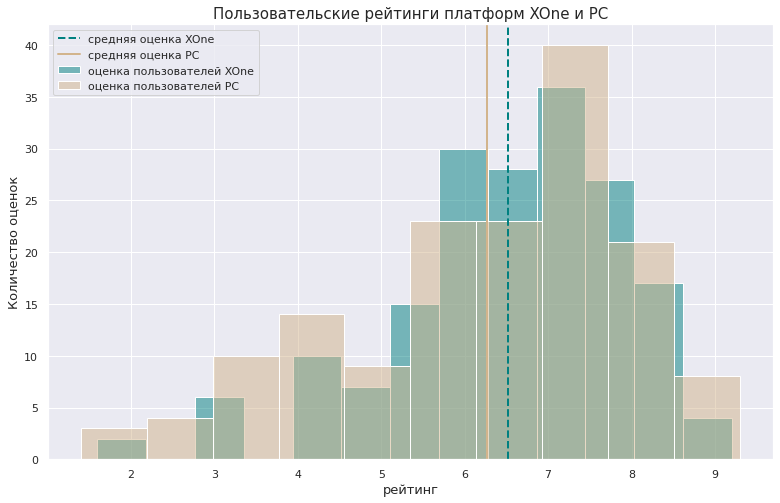

 средний рейтинг для платформы XOne: 6.52 балла      
 средний рейтинг для платформы PC: 6.27 балла


In [78]:
plt.figure(figsize=(13,8))
sns.histplot(data = xbox, x = 'user_score', color = 'teal',alpha = 0.5, label='оценка пользователей XOne')
sns.histplot(data = pc, x = 'user_score', color = 'tan',alpha = 0.5, label='оценка пользователей PC')
plt.axvline(xbox['user_score'].mean(), color = 'teal', ls='--', lw=2, label='средняя оценка XOne')
plt.axvline(pc['user_score'].mean(), color = 'tan', ls='-', lw=2, label='средняя оценка PC')
plt.title('Пользовательские рейтинги платформ XOne и PC',fontsize = 15)
plt.xlabel('рейтинг', fontsize = 13)
plt.ylabel('Количество оценок', fontsize = 13)
plt.legend()
plt.show()

print(f'\033[1;30m средний рейтинг для платформы XOne: \033[0m{round(xbox["user_score"].mean(),2)} балла\
      \n\033[1;30m средний рейтинг для платформы PC: \033[0m{round(pc["user_score"].mean(),2)} балла')

Распределения близки к нормальному, средние также находятся приблизительно на одном уровне. Проведем тест.

In [79]:
alpha = 0.05 

results = st.ttest_ind(xbox['user_score'], pc['user_score'], equal_var=False)

print(f'\033[1;30m p-value: \033[0m{results.pvalue}')

if results.pvalue < alpha:
    print('Вывод: Отвергаем нулевую гипотезу')
else:
    print('Вывод: Нет оснований отвергнуть нулевую гипотезу')

 p-value: 0.14759594013430463
Вывод: Нет оснований отвергнуть нулевую гипотезу


В данном случае значение `p-value` превышает уровень статистической значимости, поэтому оснований отвергать нулевую гипотезу. **Первая гипотеза подтвердилась.**

**Гипотеза 2. Средние пользовательские рейтинги жанров `Action` и `Sports` разные.**

Сформулируем нулевую и альтернативную гипотезы:

**H0** : средние пользовательские рейтинги жанров `Action` и `Sports` одинаковые

**H1** : средние пользовательские рейтинги жанров `Action` и `Sports` различаются

Для проверки данной гипотезы воспользуемся t-тестом (scipy.stats.ttest_ind()).
Уровень статистической значимости примем равным **5%**.

Создадим две выборки с рейтингами пользователей по необходимым жанрам и избавимся от отсутствующих значений.

In [80]:
action = act_period.query('genre == "Action"').dropna(subset=['user_score'])
sports = act_period.query('genre == "Sports"').dropna(subset=['user_score'])

In [81]:
print('Размер выборки для жанра Action:', len(action))
print('Размер выборки для жанра Sports:', len(sports))

Размер выборки для жанра Action: 389
Размер выборки для жанра Sports: 160


И снова наши выборки сильно различаются, при проведении теста воспользуемся параметром equal_var и установим False.
Посмотрим на распределение значений на графике и выведем средние показатели по двум выборкам.

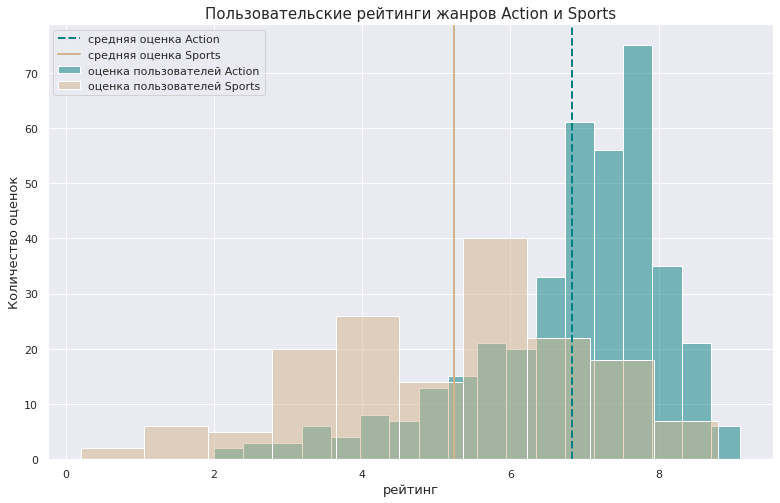

 средний рейтинг для жанра Action: 6.84 балла      
 средний рейтинг для жанра Sports: 5.24 балла


In [82]:
plt.figure(figsize=(13,8))
sns.histplot(data = action, x = 'user_score', color = 'teal',alpha = 0.5, label='оценка пользователей Action')
sns.histplot(data = sports, x = 'user_score', color = 'tan',alpha = 0.5, label='оценка пользователей Sports')
plt.axvline(action['user_score'].mean(), color = 'teal', ls='--', lw=2, label='средняя оценка Action')
plt.axvline(sports['user_score'].mean(), color = 'tan', ls='-', lw=2, label='средняя оценка Sports')
plt.title('Пользовательские рейтинги жанров Action и Sports',fontsize = 15)
plt.xlabel('рейтинг', fontsize = 13)
plt.ylabel('Количество оценок', fontsize = 13)
plt.legend()
plt.show()

print(f'\033[1;30m средний рейтинг для жанра Action: \033[0m{round(action["user_score"].mean(),2)} балла\
      \n\033[1;30m средний рейтинг для жанра Sports: \033[0m{round(sports["user_score"].mean(),2)} балла')

In [83]:
alpha = 0.05 

results = st.ttest_ind(action['user_score'], sports['user_score'], equal_var=False)

print(f'\033[1;30m p-value: \033[0m{results.pvalue}')

if results.pvalue < alpha:
    print('Вывод: Отвергаем нулевую гипотезу')
else:
    print('Вывод: Нет оснований отвергнуть нулевую гипотезу')

 p-value: 1.4460039700704315e-20
Вывод: Отвергаем нулевую гипотезу


Мы получили очень маленькое значение `p-value`, которое говорит о том, что наблюдаемое равенство в нулевой гипотезе маловероятно и мы ее отвергаем в пользу альтернативной гипотезы. Таким образом средние пользовательские рейтинги жанров `Action` и `Sports` различаются. **Вторая гипотеза подтвердилась.**

**Выводы:**

**Гипотеза первая о равенстве средних пользовательских рейтингов платформ `Xbox One` и `PC`:**

* установили пороговое значение **alpha = 0.05**, из-за различий в размерах выборок использовали параметр **equal_var = False**
* по результатам теста значение **p-value** превысило уровень статистической значимости, принимаем нулевую гипотезу о равенстве средних
**Гипотеза первая подтвердилась**
* средний рейтинг для платформы `XOne`: **6.52 балла**
* средний рейтинг для платформы `PC`: **6.45 балла**
**Гипотеза вторая о разности средних пользовательских рейтингов жанров `Action` и `Sports`:**
* установили пороговое значение **alpha = 0.05**, из-за различий в размерах выборок использовали параметр **equal_var = False**
* по результатам теста значение **p-value** оказалось ниже уровня стат.значимости, отвергаем нулевую гипотезу о равенстве средних
**Гипотеза вторая подтвердилась**
* средний рейтинг для жанра `Action`: **6.78 балла**
* средний рейтинг для жанра `Sports`: **5.65 балла**

# Шаг 5. Выводы и рекомендации

`Предобработка данных`
* выгрузили и рассмотрели имеющиеся данные
* привели названия столбцов к нижнему регистру
* рассмотрели уникальные значения в столбцах (аббревиатуру `tbd` в оценке пользователей заменили на `nan`, актуализировали рейтинги игр, а пропущенные значения рейтингов заменили на `unknown`)
* удалили пропущенные значения в названиях игр и в столбце жанр (****2 строки**) и в столбце с годом релиза игры (**269 строк**)
* привели столбцы к корректному типу данных, где это было необходимо и избавились от неявных дубликатов
* добавили столбец с ссумарными продажами по странам и удалили из него строки с выбивающимися значениями
* пропуски в столбцах с оценкой пользователей и критиков оставили без изменений, т.к. они (пропуски) составляют практически **50%** от всего датасета, а возможности подставить корректные значения у нас нет

`Исследовательский анализ данных:`
1) **Игры за весь представленный период:**
   
* Массово игры начали выпускаться с **1995 года** (в наших данных период с **1980 по 2016 г**). **2008** и **2009** года стали самыми успешными как по количеству выпущенных игр (**1425** и **1426** соответственно) так и по мировым продажам (**более 650 млн. копий**), далее наблюдается спад вплоть до **2016 года**.
* Больше всего игр было выпущенно на платформах `PS4` (лидирует и по продажам за весь период). 
* "Срок жизни" платформы в среднем составляет **10-11 лет**, "срок популярности" в районе **5-6ти лет**.

2) **Отзывы пользователей и критиков:**

* Пользователи чаще оценивали игры в **7-8 баллов** и только единицы получали **9 баллов и выше**. В целом продажи не сильно зависят от оценок пользователей.
* Оценка критиков влияет на продажи, чем выше оценка, тем больше проданных копий. Основная масса оценок критиков находится в диапазоне **70-80** и лишь немногие игры смогли получить оценку больше **90 баллов**.
* Лидерам и по высокоретинговым играм стали `PC`,`PS3` и `XOne`(**по 6**) 
* Меньше всего таких игр у `3DS`, `PSV`, (**по 1**)

3) **Игры за актуальный период (2013-2016 гг.):**

* Как по количеству выпущенных игр (**392**), так и по их продажам (**314 млн.копий**) лидирует платформа `PS4`, далее второе место занимает платформа `PS3`.
* В динамике продаж по годам для всех платформ наблюдается снижение к **2016** году. Платформы `PS4` и `XOne` являются потенциально прибыльными, вышедшие в релиз в **2013 году**, их пик популярности как раз будет приходится на **2017-2018** года. Сюда также можно добавить платформы `3DS` и `X360`, которые на протяжении всего актуального периода показывают неплохие результаты.

4) **Жанры игр:**

* Всего за актуальный период представлено **12** различных жанров
* Больше всего было выпущенно игр в жанре `Action` (**766 игр**), он же лидирует и по количеству проданных копий (**322 миллионов**). На втором месте по продажам (**233 млн.копий**) жанр `Shooter` (занимающий **5-е место** по количеству выпущенных игр), что явно говорит о популярности игр в данном жанре. На 2ом месте находятся  жанр `Role-Playing`(**292 игры**), в рейтинге продаж он расположился на 4ой строчке(**146 млн.копий**)
* По медианным продажам первое место занимает жанр `Shooter`, у него самый высокий показатель медианных продаж и самый широкий размах (**~ 0.2 - 1.4 млн. копий**), второе и третье место занимают жанры `Sports` и `Platform`. Жанр `Action`, лидирующий как по количеству выпущенных игр, так и по продажам в актуальном периоде, по медианному значению занимает **7-е место**, что говорит о его успешности только за счет выпущенных бестселлеров. Жанр `Puzzle` стабильно находится внизу рейтинга, интересно что жанр `Adventure`, занимающий третье место по количеству выпущенных игр, по медианному значению продаж показывает себя хуже всех.
* Среди игр самая продаваемая игра `GTA V` в жанре `Action`, за актуальный период было продано **56.58 млн.копий**. Следом в жанре `Shooter` идет игра `Call of Duty: Ghosts` (**27.4 миллионов**). В жанре `Misc` самая популярная игра `Minecraft` (**24.16 млн.копий**), у жанра `Role-Playing` фаворит `Pokemon X/Pokemon Y` (**14.6 млн.копий**) и в жанре `Sport` лидирует игра `FIFA 15` (**17.37 млн. копий**).

`Портрет пользователя для каждого региона:`

**Портрет пользователя Японии:**

* рынок `Японии` значительно отличается от `Американского` и `Европейского`, среди топ-5 платформ представлены исключительно Японские игровые приставки и консоли, первое место в продажах у `3DS`. Доля игр для `PSV` занимает **более 56%** от глобальных продаж

* самый популярный жанг видеоигр - `Role-Playing`, на его долю приходиться треть мировых продаж. Второе место занимает `Action`

* среди рейтингов первое место занимает `unknown`, в данном случае есть два варианта, в наших данных это пропущенные значения, которые нам не удалось восполнить, либо, т.к. в `Японии` и `Европе` есть собственные рейтинговые организации (`PEGI` и `CERO`), выпускаемым играм не выставлялся рейтинг `ESRB`.

**Портрет пользователя Северной Америки:**

* самые популярные игры для платформы `PS4`, второе и третье место делять платформы `XOne` и `X360`. По доле продаж компания `Microsoft` крайне успешна на рынке видеоигр в `Северной Америке`: игры на платформе `X360` занимают **60%** глобальных продаж, а у `XOne` - **58.4%**

* жанровое предпочтение отдается `Action`, `Shooter` и `Sports`.

* самые продаваемые игры с рейтингами `М` (mature 17+) и `unknown` 

**Портрет пользователя Европы:**

* в лидерах продаж игры для платформы `PS4`, далее идут платформы `PS3` и `XOne`. Основные продажи видеоигр приходятся на игровые приставки компании `Sony`: `PS3` - **37%**, `PS4` - **45%** от мировых продаж, а игры для `PC` имеют долю почти **60%** от мировых продаж

* среди жанров вкусы пользователей схожи с `Северной Америкой`, лидеры - `Action`, `Shooter` и `Sports`

* среди рейтингов также лидируют игры для взрослых `М` (mature 17+) и для детской аудитории `E`(Everyone 0+)

`Проверка гипотез:`

**Гипотеза первая о равенстве средних пользовательских рейтингов платформ `Xbox One` и `PC` подтвердилась.**
    
* средний рейтинг для платформы `XOne`: **6.52 балла**
* средний рейтинг для платформы `PC`: **6.45 балла**

**Гипотеза вторая о разности средних пользовательских рейтингов жанров `Action` и `Sports` подтвердилась.**
    
* средний рейтинг для жанра `Action`: **6.78 балла**
* средний рейтинг для жанра `Sports`: **5.65 балла**


`Рекомендации:`

**Для планирования рекламных компаний на 2017 год мы бы рекомендовали опираться на предпочтения рынка и разделить рекламные кампании по регионам:**
* пользователи рынка `Японии` предпочитают портативные консоли, больше всего популярны игры для `3DS` и `PSV`. Самый популярный жанр игр `Role-Playing`
* для рынка `Северной Америки` уделить внимания продуктам компании `Microsoft`, играм в жанрах `Action` и `Shooter`
* для рынка `Европы` сделать упор на продукцию `Sony`, предпочтительные жанры также `Action` и `Shooter`
